<a href="https://colab.research.google.com/github/shoaib-xit/ab-capstone-project-module2/blob/main/Amazon_Prime_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Amazon Prime TV Shows and Movies Analysis**



##### **Project Type**    - **EDA**
##### **Contribution**    - **Individual**


# **Project Summary -**


*   **Business Overview**

      *In today's competitive streaming industry, platforms like **Amazon Prime Video** are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.*

*   **Project Overview**

       *While minimizing erosion of current subscribers base is one primary goal,staying relevant in the evolving streaming industry business is another big challenge. In this project, content datasets of the **Amazon Prime Video** platform will be analyzed using exploratory data analysis to identify the main indicators and trends which would then used by the company to draw useful insights to meet their business goals.*






# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**To analyze all shows available on the Amazon Prime Video streaming platform by using the provided datasets, and thus extract valuable insights such as:**

*   **Content Diversity:** *What genres and categories dominate the platform?*
*   **Regional Availability:** *How does content distribution vary across different regions?*
* **Trends Over Time:** *How has Amazon Prime’s content library evolved?*
* **IMDb Ratings & Popularity:** *What are the highest-rated or most popular shows on the platform?*




#### **Define Your Business Objective?**

To understand various factors such as Content Diversity, Regional Availabilty , Popularity and other trends from the Amazon Prime Video Streaming Content Library and understand its influence on subscription growth, user engagement and Return on Investment (ROI).

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ast
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

### Dataset Loading

In [2]:
# Mount Google Drive to access the Amazon Prime Video datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Datasets
df_titles=pd.read_csv('/content/drive/My Drive/titles.csv')  ## Project Dataset - Amazon prime videos Titles Dataset
df_credits=pd.read_csv('/content/drive/My Drive/credits.csv') ## Project Dataset - Amazon prime videos Credits Dataset
df_countries=pd.read_csv('/content/drive/My Drive/CountryCodes.csv') ## self prepared - supporting dataset to replace countryCodes with their respective country name.


### Dataset First View

In [4]:
# Titles Dataset First Look
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [5]:
# Credits Dataset First Look
df_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [6]:
#Country Code with Names dataset first look
df_countries.head()

,CountryName,CountryCode
0,Andorra,AD
1,United Arab Emirates,AE
2,Afghanistan,AF
3,Antigua and Barbuda,AG
4,Anguilla,AI


### Dataset Rows & Columns count

In [7]:
# Titles Dataset Rows & Columns count
df_titles.shape

(9871, 15)

In [8]:
# Credits Dataset Rows & Columns count
df_credits.shape

(124235, 5)

### Dataset Information

In [9]:
# Titles Dataset Info
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [10]:
# Credits Dataset Info
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [11]:
# Countries Dataset Info
df_countries.dropna(inplace=True)
df_countries.info()


<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 240
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  240 non-null    object
 1   CountryCode  240 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


#### Duplicate Values

In [12]:
# Function to display Dataset Duplicate Value Counts
def display_duplicate_counts():
  try:
      print(f'Dataset-df_titles ::: Duplicate Record Count: {df_titles.duplicated().sum()}') # 3 duplicate records in titles data set
      print(f'Dataset-df_credits ::: Duplicate Record Count: {df_credits.duplicated().sum()}') # 56 duplicate records in credits set
  except Exception as e:
    print("Below error occurred during display_duplicate_counts function call.Please check and retry")
    print(f"{str(e)}")

# Function to remove duplicate records in datasets
def remove_duplicate_records():
  try:
    df_titles.drop_duplicates(inplace=True)
    df_credits.drop_duplicates(inplace=True)
    print('Duplicate Records removal from both datasets ...Completed')
    display_duplicate_counts()

  except Exception as e:
    print("Below error occurred during remove_duplicate_records function call.Please check and retry")
    print(f"{str(e)}")

In [13]:
# Call Function to display duplicate values in both datsets
display_duplicate_counts()
# Call Function to remove duplicate values in both datsets
remove_duplicate_records()

Dataset-df_titles ::: Duplicate Record Count: 3
Dataset-df_credits ::: Duplicate Record Count: 56
Duplicate Records removal from both datasets ...Completed
Dataset-df_titles ::: Duplicate Record Count: 0
Dataset-df_credits ::: Duplicate Record Count: 0


#### Missing Values/Null Values

In [14]:
# Define function to display Missing Values/Null Values Count
def display_null_values_count():
  try:
    print('-' * 40)
    print("df_titles Dataset Null Values (Counts)")
    print('-' * 40)
    print(df_titles.isnull().sum())
    print('-' * 40)
    print("df_credits Dataset Null Values (Counts)")
    print('-' * 40)
    print(df_credits.isnull().sum())
  except Exception as e:
    print("Below error occurred during display_null_values_count function call.Please check and retry")
    print(f"{str(e)}")

# display null values in both datsets
display_null_values_count()

----------------------------------------
df_titles Dataset Null Values (Counts)
----------------------------------------
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6484
runtime                    0
genres                     0
production_countries       0
seasons                 8511
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2080
dtype: int64
----------------------------------------
df_credits Dataset Null Values (Counts)
----------------------------------------
person_id        0
id               0
name             0
character    16277
role             0
dtype: int64


In [15]:
# However, '[]' values are present in both genres and production_countries columns of the titles.csv dataset.Replaced those with  null(np.nan) to indicate missing values
def replace_blank_list_columns_with_nulls():
  try:
      df_titles.genres.replace('[]',np.nan,inplace=True) ## 209 '[]' genres are available
      df_titles.production_countries.replace('[]',np.nan,inplace=True) ## 821 '[]' regions are available
      print("Replacement of '[]' values  with actual null in both genres and production_countries columns of df_titles dataset...Completed")
      print(f"Post Replacement >> Column 'genres' missing value count: {df_titles.genres.isnull().sum()} ::: Column 'production_countries' missing value count: {df_titles.production_countries.isnull().sum()}")
  except Exception as e:
      print("Below error occurred during replace_blank_list_columns_with_nulls function call.Please check and retry")
      print(f"{str(e)}")

# call function to replace blank list value in both genres and production countries columns
replace_blank_list_columns_with_nulls()
# display null values in both datsets
display_null_values_count()


Replacement of '[]' values  with actual null in both genres and production_countries columns of df_titles dataset...Completed
Post Replacement >> Column 'genres' missing value count: 209 ::: Column 'production_countries' missing value count: 821
----------------------------------------
df_titles Dataset Null Values (Counts)
----------------------------------------
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6484
runtime                    0
genres                   209
production_countries     821
seasons                 8511
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2080
dtype: int64
----------------------------------------
df_credits Dataset Null Values (Counts)
----------------------------------------
person_id        0
id               0
name             0
charac

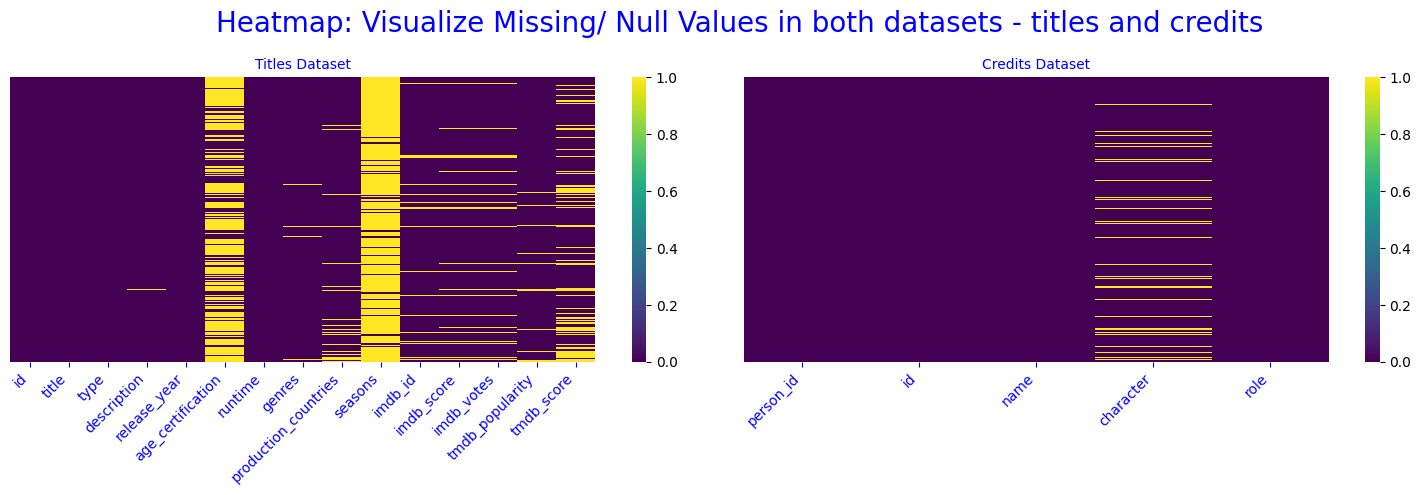

In [16]:
# Now, Visualizing the missing values in both datasets
def visualize_missing_values():
  try:
      fig, axs = plt.subplots(1,2,figsize=(15,5))
      sns.heatmap(df_titles.isnull(), cmap='viridis',ax=axs[0],yticklabels=False)
      axs[0].set_title('Titles Dataset',fontsize=10,color='blue')
      axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
      axs[0].tick_params(colors='blue')
      sns.heatmap(df_credits.isnull(), cmap='viridis',ax=axs[1],yticklabels=False)
      axs[1].set_title('Credits Dataset',fontsize=10,color='blue')
      axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
      axs[1].tick_params(colors='blue')
      fig.suptitle('Heatmap: Visualize Missing/ Null Values in both datasets - titles and credits',fontsize=20,color='blue')

      plt.tight_layout()
      plt.show()

  except Exception as e:
      print("Below error occurred during visualize_missing_values function call.Please check and retry")
      print(f"{str(e)}")

# call function to visualize blank values in both datasets
visualize_missing_values()

### What did you know about your dataset?

The provided data set contains all details related to shows available on Amazon Prime Video streaming platform. This data set has 2 csv files (titles.csv and credits.csv) and it is a mix of categorical and numeric values.These datasets have data available in the United States.

Basically, **titles** contains the content (TV Shows or Movies) related details such as title, type,genres etc. whereas **credits** contains the actors/directors details that have got a role on each title.The id (title id) field is the common key field between these 2 sets that can be used to join/merge these 2 dataframes.

**df_titles dataset:** It has 9871 rows and 15 columns with 3 duplicate records which were removed above as mentioned in the Duplicate Values section.Initially, 8 columns with missing values were discovered but with columns genres and production countries having 'empty list' values like [] ,those were replaced with nulls to get proper account of null values.So, finally 10 columns have missing values as described above in the missing values/Null Values section and visualized in the above HeatMap plot.

**df_credits dataset:** It has 124235 rows and 5 columns with 56 duplicate records which were removed above as mentioned in the Duplicate Values section.Only 1 column, character which is of object type has null values as visualized in the above HeatMap plot.

**df_countries dataset:** This dataset is a supplementary/supporting dataset prepared from Country related information available online. This contains the country code and correpsonding country names.Post null cleanup ,it has 240 rows and 2 columns.The primary use of this dataset is to translate country codes in the 'production_countries' column of titles dataset to a more meaningful Country Name which would be done subsequently as part of the data wrangling step.

Post cleaning and data wrangling, both these datasets will be used for analysis to understand various factors such as Content Diversity, Regional Availabilty etc. as highlighted in the Project objective.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns - df_titles
df_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [18]:
# Dataset Columns - df_credits
df_credits.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [19]:
# Dataset Describe df_titles numerical columns
df_titles.describe(include='number')


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9868.000000,9868.000000,1357.000000,8847.000000,8.837000e+03,9321.000000,7788.000000
mean,2001.345561,85.979124,2.791452,5.976534,8.536485e+03,6.912168,5.984117
std,25.792295,33.515714,4.148958,1.344028,4.592768e+04,30.008727,1.518040
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1996.000000,65.000000,1.000000,5.100000,1.180000e+02,1.234000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.640000e+02,2.537000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.237000e+03,5.640000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [20]:
# Dataset Describe df_titles object columns
df_titles.describe(include='object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,9868,9868,9868,9749,3384,9659,9047,9201
unique,9868,9737,2,9734,11,2027,496,9201
top,ts275838,The Lost World,MOVIE,No overview found.,R,['drama'],['US'],tt13542552
freq,1,3,8511,5,1249,908,4807,1


In [21]:
# Dataset Describe df_credits all columns
df_credits.describe(include='all')

,person_id,id,name,character,role
count,1.241790e+05,124179,124179,107902,124179
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115793
mean,4.065843e+05,NaN,NaN,NaN,NaN
std,5.617204e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.898850e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712810e+05,NaN,NaN,NaN,NaN


### Variables Description

***df_titles dataset:***

*   **id:** The title ID on JustWatch.It is unique(primary key) for each title.
*   **title:** The name of the title.
*   **show_type:** TV show or movie.
*   **description:** A brief description.
*   **release_year:** The release year of the title.
*   **age_certification:** The age certification.
*   **runtime:** The length of the episode (SHOW) or movie in minutes.
*   **genres:** A list of genres in form of list eg. **['Drama','Horror']** that apply to each title
*   **production_countries:** A list of country codes eg. **['US','CA']** that produced the title.
*   **seasons:** Number of seasons if it's a SHOW.
*   **imdb_id:** The title ID on IMDB.
*   **imdb_score:** Score on IMDB.Rating of any title.
*   **imdb_votes:** Votes on IMDB.
*   **tmdb_popularity:** Popularity on TMDB.Popularity weighted average.
*   **tmdb_score:** Score on TMDB. Rating/avg. user opinion of any title on TMDb

***df_credits dataset:***

*   **person_ID:** The person ID on JustWatch.
*   **id:** The title ID on JustWatch. merge key for joining with titles dataset.
*   **name:** The actor or director's name.
*   **character_name:** The character name the person played in the title.
*   **role:** Role the person plays. Only two distinct values ACTOR or DIRECTOR.


### Check Unique Values for each variable.

In [22]:
# Define Function to Check Unique Values for each variable/column.
def display_unique_values_count():
  try:
      print('-' * 55)
      print("df_titles Dataset Column Wise Unique Values (Counts)")
      print('-' * 55)
      for i in df_titles.columns.tolist():
        print("No. of unique values in ",i,"is",df_titles[i].nunique(),".")
      print('-' * 55)
      print("df_credits Dataset Column Wise Unique Values (Counts)")
      print('-' * 55)
      for i in df_credits.columns.tolist():
        print("No. of unique values in ",i,"is",df_credits[i].nunique(),".")
  except Exception as e:
    print("Below error occurred during display_unique_values_count function call.Please check and retry")
    print(f"{str(e)}")

# Call Fucntion to display null values in both datsets
display_unique_values_count()

-------------------------------------------------------
df_titles Dataset Column Wise Unique Values (Counts)
-------------------------------------------------------
No. of unique values in  id is 9868 .
No. of unique values in  title is 9737 .
No. of unique values in  type is 2 .
No. of unique values in  description is 9734 .
No. of unique values in  release_year is 110 .
No. of unique values in  age_certification is 11 .
No. of unique values in  runtime is 207 .
No. of unique values in  genres is 2027 .
No. of unique values in  production_countries is 496 .
No. of unique values in  seasons is 32 .
No. of unique values in  imdb_id is 9201 .
No. of unique values in  imdb_score is 86 .
No. of unique values in  imdb_votes is 3650 .
No. of unique values in  tmdb_popularity is 5325 .
No. of unique values in  tmdb_score is 89 .
-------------------------------------------------------
df_credits Dataset Column Wise Unique Values (Counts)
-------------------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

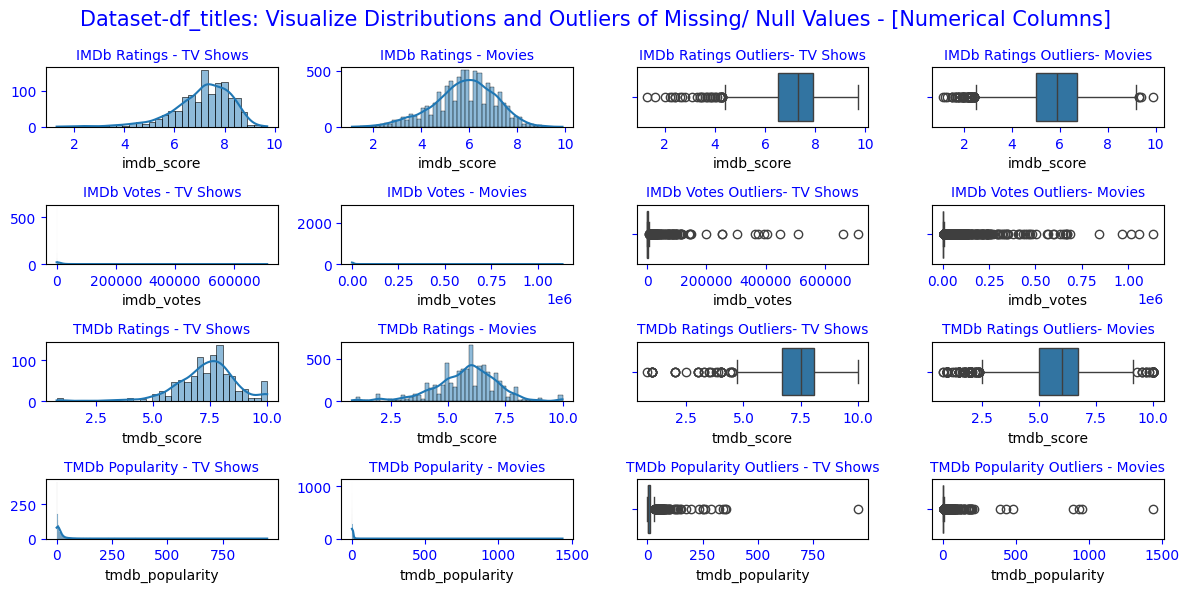

In [23]:
# Visualizing the Distribution /Outliers of specific Numerical Columns(having null values) from above heatmap namely imdb_score, imdb_votes, tmdb_score,tmdb_popularity

def visualize_numerical_columns_distributions():
  try:
      fig1, axs1 = plt.subplots(4,4,figsize=(12,6))

      sns.histplot(data=df_titles[df_titles['type']=='SHOW'],x='imdb_score',kde=True ,ax=axs1[0,0])
      axs1[0,0].set_title('IMDb Ratings - TV Shows',fontsize=10,color='blue')
      axs1[0,0].tick_params(colors='blue')
      axs1[0,0].set(ylabel=None)
      sns.histplot(data=df_titles[df_titles['type']=='MOVIE'],x='imdb_score',kde=True,ax=axs1[0,1])
      axs1[0,1].set_title('IMDb Ratings - Movies',fontsize=10,color='blue')
      axs1[0,1].tick_params(colors='blue')
      axs1[0,1].set(ylabel=None)
      sns.boxplot(data=df_titles[df_titles['type']=='SHOW'],x='imdb_score',ax=axs1[0,2])
      axs1[0,2].set_title('IMDb Ratings Outliers- TV Shows',fontsize=10,color='blue')
      axs1[0,2].tick_params(colors='blue')
      sns.boxplot(data=df_titles[df_titles['type']=='MOVIE'],x='imdb_score',ax=axs1[0,3])
      axs1[0,3].set_title('IMDb Ratings Outliers- Movies',fontsize=10,color='blue')
      axs1[0,3].tick_params(colors='blue')


      sns.histplot(data=df_titles[df_titles['type']=='SHOW'],x='imdb_votes',kde=True,ax=axs1[1,0])
      axs1[1,0].set_title('IMDb Votes - TV Shows',fontsize=10,color='blue')
      axs1[1,0].tick_params(colors='blue')
      axs1[1,0].set(ylabel=None)
      sns.histplot(data=df_titles[df_titles['type']=='MOVIE'],x='imdb_votes',kde=True,ax=axs1[1,1])
      axs1[1,1].set_title('IMDb Votes - Movies',fontsize=10,color='blue')
      axs1[1,1].tick_params(colors='blue')
      axs1[1,1].set(ylabel=None)
      sns.boxplot(data=df_titles[df_titles['type']=='SHOW'],x='imdb_votes',ax=axs1[1,2])
      axs1[1,2].set_title('IMDb Votes Outliers- TV Shows',fontsize=10,color='blue')
      axs1[1,2].tick_params(colors='blue')
      sns.boxplot(data=df_titles[df_titles['type']=='MOVIE'],x='imdb_votes',ax=axs1[1,3])
      axs1[1,3].set_title('IMDb Votes Outliers- Movies',fontsize=10,color='blue')
      axs1[1,3].tick_params(colors='blue')


      sns.histplot(data=df_titles[df_titles['type']=='SHOW'],x='tmdb_score',kde=True,ax=axs1[2,0])
      axs1[2,0].set_title('TMDb Ratings - TV Shows',fontsize=10,color='blue')
      axs1[2,0].tick_params(colors='blue')
      axs1[2,0].set(ylabel=None)
      sns.histplot(data=df_titles[df_titles['type']=='MOVIE'],x='tmdb_score',kde=True,ax=axs1[2,1])
      axs1[2,1].set_title('TMDb Ratings - Movies',fontsize=10,color='blue')
      axs1[2,1].tick_params(colors='blue')
      axs1[2,1].set(ylabel=None)
      sns.boxplot(data=df_titles[df_titles['type']=='SHOW'],x='tmdb_score',ax=axs1[2,2])
      axs1[2,2].set_title('TMDb Ratings Outliers- TV Shows',fontsize=10,color='blue')
      axs1[2,2].tick_params(colors='blue')
      sns.boxplot(data=df_titles[df_titles['type']=='MOVIE'],x='tmdb_score',ax=axs1[2,3])
      axs1[2,3].set_title('TMDb Ratings Outliers- Movies',fontsize=10,color='blue')
      axs1[2,3].tick_params(colors='blue')

      sns.histplot(df_titles[df_titles['type']=='SHOW'],x='tmdb_popularity',kde=True,ax=axs1[3,0])
      axs1[3,0].set_title('TMDb Popularity - TV Shows',fontsize=10,color='blue')
      axs1[3,0].tick_params(colors='blue')
      axs1[3,0].set(ylabel=None)
      sns.histplot(df_titles[df_titles['type']=='MOVIE'],x='tmdb_popularity',kde=True,ax=axs1[3,1])
      axs1[3,1].set_title('TMDb Popularity - Movies',fontsize=10,color='blue')
      axs1[3,1].tick_params(colors='blue')
      axs1[3,1].set(ylabel=None)
      sns.boxplot(data=df_titles[df_titles['type']=='SHOW'],x='tmdb_popularity',ax=axs1[3,2])
      axs1[3,2].set_title('TMDb Popularity Outliers - TV Shows',fontsize=10,color='blue')
      axs1[3,2].tick_params(colors='blue')
      sns.boxplot(data=df_titles[df_titles['type']=='MOVIE'],x='tmdb_popularity',ax=axs1[3,3])
      axs1[3,3].set_title('TMDb Popularity Outliers - Movies',fontsize=10,color='blue')
      axs1[3,3].tick_params(colors='blue')
      fig1.suptitle('Dataset-df_titles: Visualize Distributions and Outliers of Missing/ Null Values - [Numerical Columns]',fontsize=15,color='blue')

      plt.tight_layout()
      plt.show()

  except Exception as e:
      print("Below error occurred during visualize_numerical_columns_distributions function call.Please check and retry")
      print(f"{str(e)}")

# call function to visualize numerical value distrbutions/outliers in title dataset
visualize_numerical_columns_distributions()


In [24]:
###### Define function to impute numerical columns - imdb_score, imdb_votes, tmdb_score,tmdb_popularity and seasons
def impute_titles_numerical_columns():

  try:

    ###### Median Imputation for imdb_score null values for the type=='SHOW' as there is slightly left skewed as seen from above univariate distributions
    shows_rating_median_value=np.round(df_titles[df_titles['type']=='SHOW']['imdb_score'].median(),1)
    df_titles.loc[df_titles['type']=='SHOW','imdb_score']=df_titles.loc[df_titles['type']=='SHOW','imdb_score'].fillna(shows_rating_median_value)
    print(f'Imputation of imdb_score column for TV Shows data with median value: {shows_rating_median_value}...Completed')

    ###### Mean Imputation for imdb_score null values for the rows  with type=='MOVIE' as it is showing as a normal distribution (ND)
    movie_rating_mean_value=np.round(df_titles[df_titles['type']=='MOVIE']['imdb_score'].mean(),1)
    df_titles.loc[df_titles['type']=='MOVIE','imdb_score']=df_titles.loc[df_titles['type']=='MOVIE','imdb_score'].fillna(movie_rating_mean_value)
    print(f'Imputation of imdb_score column for Movies data with mean value: {movie_rating_mean_value}...Completed')

    ###### Median Imputation for imdb_votes null values for both movies and shows as there is right skewedness in both the plots
    shows_votes_median_value=np.round(df_titles[df_titles['type']=='SHOW']['imdb_votes'].median())
    df_titles.loc[df_titles['type']=='SHOW','imdb_votes']=df_titles.loc[df_titles['type']=='SHOW','imdb_votes'].fillna(shows_votes_median_value)
    print(f'Imputation of imdb_votes column for TV Shows data with median value: {shows_votes_median_value}...Completed')

    movie_votes_median_value=np.round(df_titles[df_titles['type']=='MOVIE']['imdb_votes'].median())
    df_titles.loc[df_titles['type']=='MOVIE','imdb_votes']=df_titles.loc[df_titles['type']=='MOVIE','imdb_votes'].fillna(movie_votes_median_value)
    print(f'Imputation of imdb_votes column for Movie data with median value: {movie_votes_median_value}...Completed')

    ###### Median Imputation for tmdb_score null values for the type=='SHOW' as there is slightly left skewed as seen from above univariate distributions
    shows_tmdb_score_median_value=np.round(df_titles[df_titles['type']=='SHOW']['tmdb_score'].median(),1)
    df_titles.loc[df_titles['type']=='SHOW','tmdb_score']=df_titles.loc[df_titles['type']=='SHOW','tmdb_score'].fillna(shows_tmdb_score_median_value)
    print(f'Imputation of tmdb_score column for TV Shows data with median value: {shows_tmdb_score_median_value}...Completed')

    ###### Mean Imputation for tmdb_score null values for the rows  with type=='MOVIE' as it is a Normal Distribution as seen above
    movie_tmdb_score_mean_value=np.round(df_titles[df_titles['type']=='MOVIE']['tmdb_score'].mean(),1)
    df_titles.loc[df_titles['type']=='MOVIE','tmdb_score']=df_titles.loc[df_titles['type']=='MOVIE','tmdb_score'].fillna(movie_tmdb_score_mean_value)
    print(f'Imputation of tmdb_score column for Movies data with mean value: {movie_tmdb_score_mean_value}...Completed')

     ###### Median Imputation for tmdb_popularity null values for both movies and shows as there is right skewedness in both the plots
    shows_tmdb_pop_median_value=np.round(df_titles[df_titles['type']=='SHOW']['tmdb_popularity'].median())
    df_titles.loc[df_titles['type']=='SHOW','tmdb_popularity']=df_titles.loc[df_titles['type']=='SHOW','tmdb_popularity'].fillna(shows_tmdb_pop_median_value)
    print(f'Imputation of tmdb_popularity column for TV Shows data with median value: {shows_tmdb_pop_median_value}...Completed')

    movie_tmdb_pop_median_value=np.round(df_titles[df_titles['type']=='MOVIE']['tmdb_popularity'].median())
    df_titles.loc[df_titles['type']=='MOVIE','tmdb_popularity']=df_titles.loc[df_titles['type']=='MOVIE','tmdb_popularity'].fillna(movie_tmdb_pop_median_value)
    print(f'Imputation of tmdb_popularity column for Movies data with median value: {movie_tmdb_pop_median_value}...Completed')

    ## Constant Imputation for seasons. As Seasons  correspond to TV Shows, The 8511 null values belong to Movie category. So, imputed those with value 0
    df_titles.seasons.fillna(0,inplace=True)
    print('Imputation of seasons column for Movies data with constant value 0...Completed')

  except Exception as e:
    print("Below error occurred during execution of impute_titles_numerical_columns function.Please check and retry")
    print(f"{str(e)}")


###### Define function to handle missing values in object columns of both datasets, namely- genres, production_countries, imdb_id, description,age_certification and character
def impute_datasets_object_columns():

  try:

    #df_titles.dropna(subset=['genres'],inplace=True)
    df_titles.genres.fillna("['Unknown']",inplace=True)
    print(f'Imputation of missing genres values in title dataset with value "Unknown"...Completed')

    #df_titles.dropna(subset=['production_countries'],inplace=True)
    df_titles.production_countries.fillna("['Unknown']",inplace=True)
    print(f'Imputation of missing production_countries values in title dataset with value "Unknown"...Completed')

    # production_countries has few records with country code as "United Stated of America". Updated those to US for consistency in country code values
    df_titles['production_countries']=df_titles['production_countries'].str.replace("United States of America","US") # changed United States of America to US
    print(f'Updating value "United States of America" to "US" in production_countries column of the title dataset...Completed')

    #imdb_id null vales updated to 'Unknown'
    df_titles.imdb_id.fillna('Unknown',inplace=True)
    print(f'Imputation of missing imdb_id values in title dataset with value "Unknown"...Completed')

    #Description column null values updated to 'Unknown'
    df_titles.description.fillna('Unknown',inplace=True)
    print(f'Imputation of missing description values in title dataset with value "Unknown"...Completed')

    #Replace null age_certification values  with 'Unknown' placeholder
    df_titles.age_certification.fillna('Unknown',inplace=True)
    print(f'Imputation of missing age_certification values in title dataset with value "Unknown"...Completed')

    # credits dataset - character column null values udpated to 'Unknown'
    df_credits.character.fillna('Unknown',inplace=True)
    print(f'Imputation of missing character values in credits dataset with value "Unknown"...Completed')

  except Exception as e:
    print("Below error occurred during execution of impute_datasets_object_columns function.Please check and retry")
    print(f"{str(e)}")


In [25]:
###### Call function to impute numerical columns of titles dataset
impute_titles_numerical_columns()

Imputation of imdb_score column for TV Shows data with median value: 7.3...Completed
Imputation of imdb_score column for Movies data with mean value: 5.8...Completed
Imputation of imdb_votes column for TV Shows data with median value: 480.0...Completed
Imputation of imdb_votes column for Movie data with median value: 460.0...Completed
Imputation of tmdb_score column for TV Shows data with median value: 7.5...Completed
Imputation of tmdb_score column for Movies data with mean value: 5.8...Completed
Imputation of tmdb_popularity column for TV Shows data with median value: 5.0...Completed
Imputation of tmdb_popularity column for Movies data with median value: 2.0...Completed
Imputation of seasons column for Movies data with constant value 0...Completed


In [26]:
###### Call function to impute object columns of titles and credits datasets
impute_datasets_object_columns()

Imputation of missing genres values in title dataset with value "Unknown"...Completed
Imputation of missing production_countries values in title dataset with value "Unknown"...Completed
Updating value "United States of America" to "US" in production_countries column of the title dataset...Completed
Imputation of missing imdb_id values in title dataset with value "Unknown"...Completed
Imputation of missing description values in title dataset with value "Unknown"...Completed
Imputation of missing age_certification values in title dataset with value "Unknown"...Completed
Imputation of missing character values in credits dataset with value "Unknown"...Completed


In [27]:
## Final display of ull value count in both datasets poist impuations
print('Run Dislay Null Values Count Function: To Confirm 0 Null value count in both datasets post imputation')
display_null_values_count()

Run Dislay Null Values Count Function: To Confirm 0 Null value count in both datasets post imputation
----------------------------------------
df_titles Dataset Null Values (Counts)
----------------------------------------
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64
----------------------------------------
df_credits Dataset Null Values (Counts)
----------------------------------------
person_id    0
id           0
name         0
character    0
role         0
dtype: int64


In [28]:
# create function to update county codes to actual country names and Convert columns release_year to datetime, seasons and imdb_votes to integer
def perform_variable_engineering():
  try:
      # Update Country Codes as Country names using the df_countries dataset for better user experience on the various plots involving countries
      df_countries['Country']=df_countries['CountryCode']+':'+df_countries['CountryName']
      for cc in df_countries['Country']:
          ccd=cc.split(':')[0]
          cnm=cc.split(':')[1]
          df_titles['production_countries']=df_titles['production_countries'].str.replace(ccd,cnm)
      print("Dataset titles: Update of Country Codes to Country Names using df_country mapping data set...Completed")

      # variable engineering - Convert release_year to datetime, seasons and imdb_votes to integer

      df_titles['seasons'] = df_titles['seasons'].astype('int64')
      print("Dataset titles: Column seasons conversion to Integer type...Completed")

      df_titles['imdb_votes'] = df_titles['imdb_votes'].astype('int64')
      print("Dataset titles: Column imdb_votes conversion to Integer type...Completed")

      df_titles['release_year']=pd.to_datetime(df_titles['release_year'], format='%Y')
      print("Dataset titles: Column release_year conversion to datetime type...Completed")

  except Exception as e:
      print("Below error occurred during execution of perform_variable_engineering function.Please check and retry")
      print(f"{str(e)}")

# call function to perform variable engineering on specific columns
perform_variable_engineering()
print("Display Titles Info to verify all Columns:")
df_titles.info()

Dataset titles: Update of Country Codes to Country Names using df_country mapping data set...Completed
Dataset titles: Column seasons conversion to Integer type...Completed
Dataset titles: Column imdb_votes conversion to Integer type...Completed
Dataset titles: Column release_year conversion to datetime type...Completed
Display Titles Info to verify all Columns:
<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9868 non-null   object        
 1   title                 9868 non-null   object        
 2   type                  9868 non-null   object        
 3   description           9868 non-null   object        
 4   release_year          9868 non-null   datetime64[ns]
 5   age_certification     9868 non-null   object        
 6   runtime               9868 non-null   int64         
 7   genres

**Merge 2 Datasets into one and display the resulting shape**




In [29]:
# define function to merge two datasets based on key and howto parameters
def merge_datasets(df1,df2,key,howto):
  try:
      df_merged=pd.merge(df1,df2,on=key,how=howto)
      print(f"Merge of datasets completed Successfuly. Shape of Merged dataset is: {df_merged.shape}")
      return df_merged

  except Exception as e:
      print("Below error occurred during execution of merge_datasets function.Please check and retry")
      print(f"{str(e)}")

# call function to perform merging(inner type) of df_titles and df_credits based on 'id' key
prime_dataset=merge_datasets(df1=df_titles,df2=df_credits,key='id',howto='inner')

Merge of datasets completed Successfuly. Shape of Merged dataset is: (124179, 19)


**Create Subset with only one unique record for each id and display the shape**

In [30]:
# define function to remove duplicates based on a subset of columns(list) by retaining only the first duplicate record
def get_unique_recs_dataset(df,col_subset):
  try:
      df_unq=prime_dataset.drop_duplicates(subset=col_subset,keep='first')
      print(f"Dataset duplicates filtering completed Successfuly. Shape of Unique Records dataset is: {df_unq.shape}")
      print('NOTE:Unique id count in the Merged dataset matches with unique id count in the credits dataset as it is an inner join based Merge')
      return df_unq
  except Exception as e:
      print("Below error occurred during execution of get_unique_recs_dataset function.Please check and retry")
      print(f"{str(e)}")

# call function to eliminate duplicate records based on column(s) subset and print the shape of unique dataset.
df_unique_ids=get_unique_recs_dataset(df=prime_dataset,col_subset=['id'])

Dataset duplicates filtering completed Successfuly. Shape of Unique Records dataset is: (8861, 19)
NOTE:Unique id count in the Merged dataset matches with unique id count in the credits dataset as it is an inner join based Merge


In [31]:
# define function to generate new datasets by exploding column that have list of values eg. genres and production_countries
def create_exploded_datasets(df_uniq,explode_col_name,eliminate_unknowns):
  try:
    df_uniq[explode_col_name]= [ast.literal_eval(item) for item in df_uniq[explode_col_name].tolist()]
    df_uniq=df_uniq.explode(explode_col_name)
    if eliminate_unknowns:
      df_uniq=df_uniq.loc[df_uniq[explode_col_name]!='Unknown']
    return df_uniq

  except Exception as e:
      print("Below error occurred during execution of get_exploded_datasets function.Please check and retry")
      print(f"{str(e)}")

# call function to create dataset with exploded form of genres column
df_genres=create_exploded_datasets(df_uniq=df_unique_ids.copy(),explode_col_name='genres',eliminate_unknowns=True)
print(f"Dataset with explode of 'genres' column created Successfuly. Shape of df_genres: {df_genres.shape}")

# call function to create dataset with exploded form of production_countries column
df_pcountry=create_exploded_datasets(df_uniq=df_unique_ids.copy(),explode_col_name='production_countries',eliminate_unknowns=True)
print(f"Dataset with explode of 'production_countries' column created Successfuly. Shape of df_pcountry: {df_pcountry.shape}")


Dataset with explode of 'genres' column created Successfuly. Shape of df_genres: (20619, 19)
Dataset with explode of 'production_countries' column created Successfuly. Shape of df_pcountry: (9564, 19)


### What all manipulations have you done and insights you found?

####**IMPUTATION** approach for handling missing numerical column values **(df_titles)**:

*   Performed Median Imputation of imdb_score missing values for the type **'SHOW'** as left skewedness can be observed from above plots

*  Performed Mean Imputation of imdb_score null values for the type **'MOVIE'** as plot show almost a normal distribution (ND)
  
* Performed Median Imputation of imdb_votes missing values for the type **'SHOW'** as right skewedness observed in above plots

* Performed Median Imputation of imdb_votes missing values for the type **'MOVIE'** as right skewedness observed in above plots
    
* Performed Median Imputation of tmdb_score missing values for the type **'SHOW'** as slight left skewedness can be observed

* Performed Mean Imputation of tmdb_score null values for the type **'MOVIE'** as plot shows almost a Normal Distribution

* Performed Median Imputation of tmdb_popularity missing values for the type **'SHOW'** as right skewedness can be observed

* Performed Median Imputation of tmdb_popularity missing values for the type **'MOVIES'** as right skewedness can be observed **bold text**

* Performed Constant Imputation for seasons missing values. Since Seasons correspond only to **TV Shows** and the 8511 null values belong to **Movie** category. Therefore, imputed those with constant value 0

####**IMPUTATION** approach for handling missing object(string) column values in both datasets:

* Specific observation made in case of object(string) columns - **genres and production_countries** columns is that these can hold multiple values for each title id(row) in the form of a list type. So, blank list i.e. [] is not shown as null but as a string in the dataframe context. So, I replaced all such occurrences with np.nan to give us correct picture of missing values columns.

* Performed imputation of missing genres and production_countries values with the value **"['Unknown']"**
* production_countries columns has few records with country code as **"United Stated of America"**. Updated those to **"US"** for consistency with the 2 character country code format.
* Performed imputation of remaining columns namely imdb_id,description,age_certification with the value **'Unknown'**
* Performed imputation of character column of the **df_credits** dataset with the value **'Unknown'**

####**Data Modification/Variable Engineering:**
* production_countries column: Replaced Country Code values with Country names using the df_countries dataset for better readability.
* created a new datetime column **Release_yr** for changing data type of  release_year to a proper datetime format .
    
####**INSIGHTS**:

1.   Merged dataset has 8861 unique ids corresponding to the same count of unique ids in df_credits dataset as the merge is an inner join based.
2.  119 Duplicates title (Movie names) and 6 triplicate titles can be observed in the dataset. However, there are differences in terms of description,Release_yr, genres,production countries etc. indicating each title is infact unique.
3.   Overall, MOVIE data is the dominating one with very few data related to TV Shows.
4. Boxplot of "IMDb Rating" for titles of type 'MOVIE' shows most of the data points between 5.0 and 7.0 with a mean of around 6.0. Few outliers are there densely concentrated near to the lower bound and if correlated with histogram I opted mean imputation for handling missing values

5. Boxplot of "IMDb ratings" for titles of type 'SHOW' shows most of the data points between 7.0 and 8.0 with a median of around 7.2.  Few outliers are there near lower side but  widely spread away from the lower bound and if correlated with histogram which shows left skewedness I opted median imputation for handing missing values

6. Boxplot of "IMDb Votes" for titles of type 'MOVIE' shows most of the data points in a very narrow range near 8000-20000. Most outliers are concentrated near the Lower and Upper bounds and few outliers are way far from the Upper Bound  and if correlated with histogram which shows steep righ skewedness,so I opted median imputation for handling missing values

7. Boxplot of "IMDb Votes" for titles of type 'SHOW' shows most of the data points in a very narrow range near 10000-15000. Most outliers are concentrated near the Upper bounds and few outliers are way far from the Upper Bound  and if correlated with histogram which shows steep right skewedness,so I opted median imputation for handling missing values

8. Boxplot of "TMDb Rating" for titles of type 'MOVIE' shows most of the data points between 5.0 and 7.0 with a mean of around 6.0. Few outliers are there densely concentrated nearer to the lower bound and few densely concentrated near the upper bound and if correlated with histogram which display almost normal distribution, I opted mean imputation for handling missing values.

9. Boxplot of "IMDb ratings" for titles of type 'SHOW' shows most of the data points between 6.0 and 8.0 with a median of around 7.5.  Few outliers are there near lower side but widely spread away from the lower bound and if correlated with histogram which shows left skewedness I opted median imputation for handing missing values

10. Boxplot of "TMDb Popularity" for titles of type 'MOVIE' shows most of the data points in a very narrow range near 5-50. Most outliers are concentrated near the Lower and Upper bounds and few outliers are way far from the Upper Bound  and if correlated with histogram which shows steep right skewedness,so I opted median imputation for handling missing values

11. Boxplot of "TMDb Popularity" for titles of type 'SHOW' shows most of the data points in a very narrow range of 10-50. Most outliers are concentrated near the Upper bounds and few outliers are way far from the Upper Bound  and if correlated with histogram which shows steep right skewedness,so I opted median imputation for handling missing values







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Pie Chart -Amazon Prime Video Content Distribution by Type - Univariate Analysis

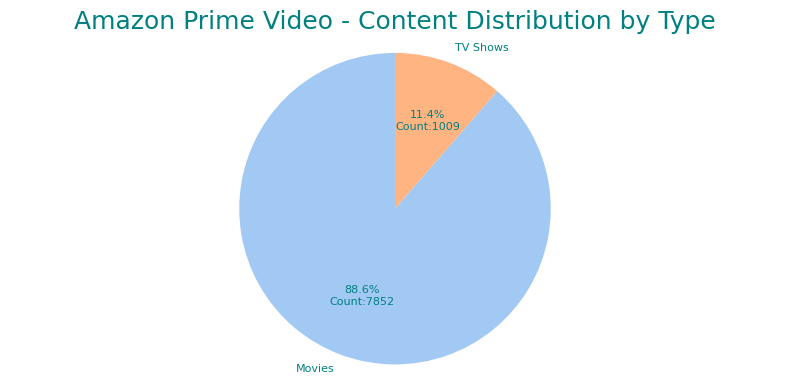

In [32]:
# Chart - 1 Pie Chart visualization code

# Define a Seaborn color palette
colors = sns.color_palette('pastel') # Other options include 'bright', 'deep', 'muted', 'dark', 'colorblind'

# Define a custom formatting function for autopct display
def custom_values(pct, all_values):
    absolute = int(round(pct / 100.0 * sum(all_values)))
    return f"{pct:.1f}%\nCount:{absolute}"

# Create the matplotlib pie chart
plt.figure(figsize=(8, 4)) # Optional: Adjust figure size
#plt.pie(df_unique_ids.type.value_counts(), labels=['Movies','TV Shows'],colors=colors, autopct='%.1f%%', startangle=90,textprops={'color':'teal','fontsize': 8})
plt.pie(df_unique_ids.type.value_counts(), labels=['Movies','TV Shows'],colors=colors, autopct=lambda pct: custom_values(pct, df_unique_ids.type.value_counts()), startangle=90,textprops={'color':'teal','fontsize': 8})
plt.title('Amazon Prime Video - Content Distribution by Type',fontsize=18,color='teal')
plt.axis('equal')

# display the pie chart
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A Pie chart is useful for showing the proportion or percentage distribution of
categories in a single variable.It helps spot categories that dominate the dataset.Pie charts are most useful when there are few categories.

In this case, goal is to visualize the content proportions by 'type' field.
This field has only two values: MOVIE and SHOW.

A pie chart is a good fit here because it clearly shows the distribution between the two categories.

##### 2. What is/are the insight(s) found from the chart?



*   From above pie chart, it is observed thare a are total of 7852 movies (88.6 %  of the total content) and 1009 TV Shows (11.4 % of the toal content).

*   Prime Video library is heavily movie-centric.The platform focuses more on movies than TV shows.

* TV Shows are under-represented.Only close to12% share, which suggests TV shows are not the main offering compared to competitors like Netflix (known for strong TV show catalogs).

* This might indicate Prime Video targets casual viewers who prefer standalone movies rather than long-term TV series engagement.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, this highlights a potential gap/opportunity for Amazon Prime to expand its TV show catalog to compete better with other competitors.

It is possible that Amazon could be using movies to quickly attract subscribers, as movies usually require less time and commitment from viewers.

However, Marketing team and sales Amazon could also focus on catering popular shows which are aired weekly once or twice but can attract subscribers owing to the popularity of those shows like comedy shows,game shows etc.




#### Chart - 2 : Horizontal Bar Chart for Content distribution by Genres - Univariate Analysis

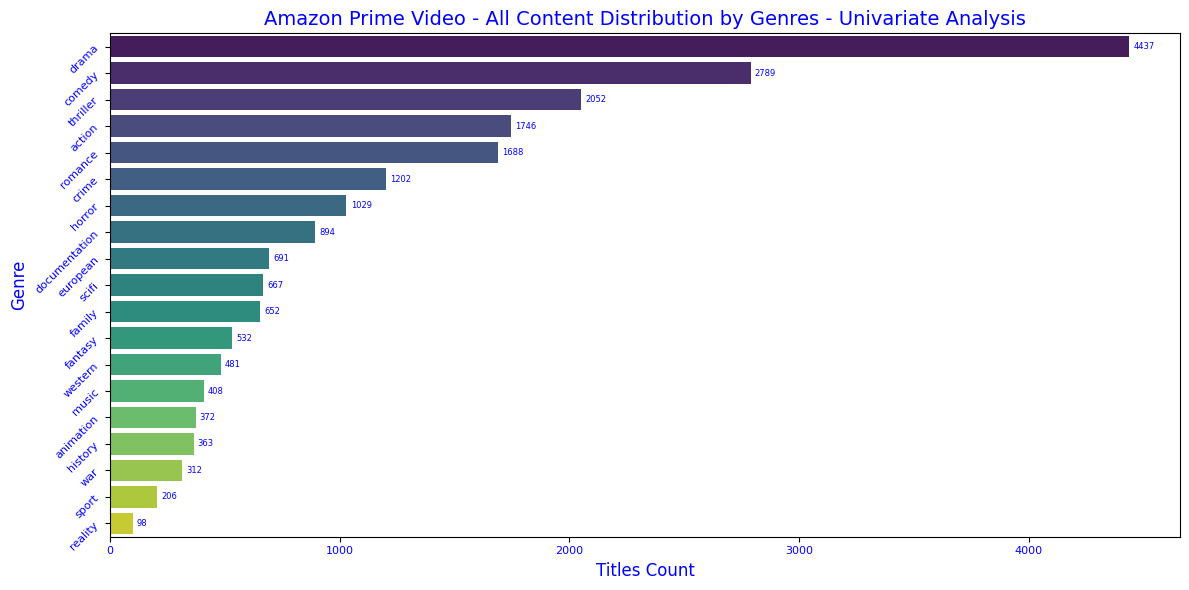

In [33]:
# Chart - 2 visualization code

# Get Count of titles for each Genre
df_bar_g=df_genres.groupby(['genres']).agg(Count=('id','count')).reset_index()
df_bar_g['Count'] = df_bar_g['Count'].astype(int)
df_bar_g=df_bar_g.sort_values(by='Count',ascending=False)

# create seaborn Horizontal bar plot with label formatting etc.
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=df_bar_g,y='genres',x='Count',palette='viridis')

# count values text to be displayed on top of each of the individual bars
for c in ax.containers:
  ax.bar_label(c, fmt='%d', padding=3,fontsize=6,color='blue')

# Font size and color settings for title, axes labels and the tick labels
ax.set_ylabel('Genre',color='blue',fontsize=12)
ax.set_xlabel('Titles Count',color='blue',fontsize=12)
ax.set_title('Amazon Prime Video - All Content Distribution by Genres - Univariate Analysis',fontsize=14,color='blue')
ax.set_yticklabels(ax.get_yticklabels(), color='blue',fontsize=8,rotation=45,ha='right')
ax.set_xticklabels(ax.get_xticklabels(), color='blue',fontsize=8)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

When you want to compare values across categories, horizontal bars align well with the human eye’s natural left-to-right reading pattern.

Also, in our case there are more categories  and generally a horizontal bar chart prevents clutter, while vertical bars can get squeezed together. There are many genres with varying names and so it is easier to read and compare.

##### 2. What is/are the insight(s) found from the chart?

* Drama (4437 titles) is the dominant genre, followed by Comedy (2789), Thriller (2052), and Action (1746).These four categories alone form the core offering of Prime Video.

* Genres like Romance (1688), Crime (1202), Horror (1029), and Documentaries (894) are well-represented but secondary.This shows Prime Video has a decent mix beyond mainstream categories.

* Genres like European (691), Sci-Fi (667), Family (652), Fantasy (532), Western (481), etc. have smaller catalogs.

* Genres like Sport (206) and Reality (98) are very limited, indicating Prime Video doesn’t prioritize these segments.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Prime Video’s library is dominated by narrative-driven genres like Drama, Comedy etc. which attract long-term engagement.So Marketing and Sales team can continue catering these genres with similar content to attract more subscribers.

However, There’s a content imbalance: over-investment in Drama/Comedy vs. underrepresentation in genres like Reality, Sports, and War.

So, Opportunity exists for strategic expansion into Reality TV, Sports, and Animated content, where competitor platforms often thrive.

#### Chart -3: BarChart - Content distribution by Type and Genres - Bivariate

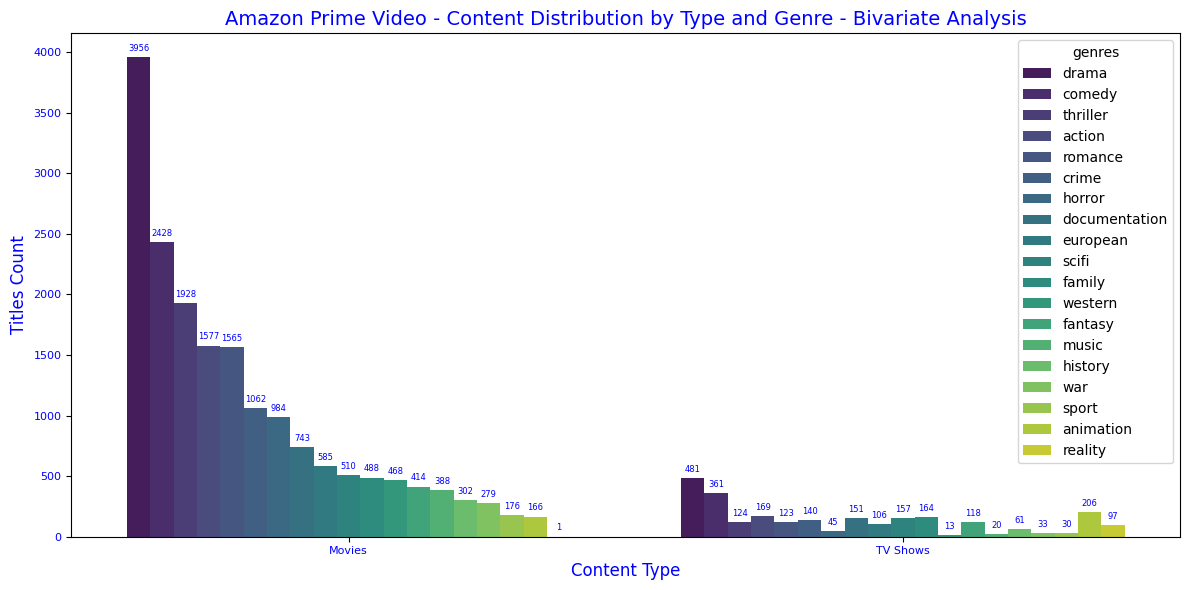

In [34]:
# Chart - 3 visualization code

# Get Count of titles for each type and Genre
df_barc_tg=df_genres.groupby(['type','genres']).agg(Count=('id','count')).reset_index()
df_barc_tg['Count'] = df_barc_tg['Count'].astype(int)
df_barc_tg=df_barc_tg.sort_values(by=['type','Count'],ascending=[True,False])

# create seaborn bar plot with label formatting etc.
fig1,ax1=plt.subplots(figsize=(12,6))
sns.barplot(data=df_barc_tg,x='type',y='Count',hue='genres',palette='viridis')

# count values text to be displayed on top of each of the individual bars
for c in ax1.containers:
  ax1.bar_label(c, fmt='%d', padding=3,fontsize=6,color='blue')

# Font size and color settings for title, axes labels and the tick labels
ax1.set_xlabel('Content Type',color='blue',fontsize=12)
ax1.set_ylabel('Titles Count',color='blue',fontsize=12)
ax1.set_title('Amazon Prime Video - Content Distribution by Type and Genre - Bivariate Analysis',fontsize=14,color='blue')
ax1.set_xticklabels(['Movies','TV Shows'], color='blue',fontsize=8)
ax1.set_yticklabels(ax1.get_yticklabels(), color='blue',fontsize=8)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

* As shown, A bar chart makes it easy to compare the number of titles between Movies and TV Shows within each genre.

* Also, there are many genres so bar charts can display all of them without clutter unlike pie charts, which would be unreadable with so many slices

I used this specifically because for our case we need Grouped bar charts (Movies vs TV Shows side by side) that helps directly compare distributions within each genre.

##### 2. What is/are the insight(s) found from the chart?

* Almost every genre has far more Movies than TV Shows.
Example: Drama (Movies = 3956 vs TV Shows = 481), Comedy (Movies = 2428 vs TV Shows = 361).
* However, Reality (97) and Sports (206) are relatively stronger for TV shows compared to their movie counterparts.
* Top genres for TV Shows are Drama and Comedy as like their movie counter parts
* Genres like Action, Crime, Sci-Fi, and Documentary also appear in moderate numbers.
* In TV Shows, Very low counts for War (20), History (61), Fantasy (33), Music (13), and Animation (30).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Business teams can strategically invest in TV Shows, especially in underrepresented genres (Reality, Sports, Animation), to increase user engagement and compete with other platforms like Netflix/Disney+ etc.

Also, It is seen that Drama & Comedy dominate. While this satisfies a broad audience, this might also lead to content fatigue/boredom and directly impact the customer retention.Adding variety (more niche genres) can retain diverse viewer groups and reduce churn.

If unaddressed, recommendation systems will keep pushing the same genres resulting in poor user experience.

#### Chart - 4 - Line Plot - Content Library Release Year Trends

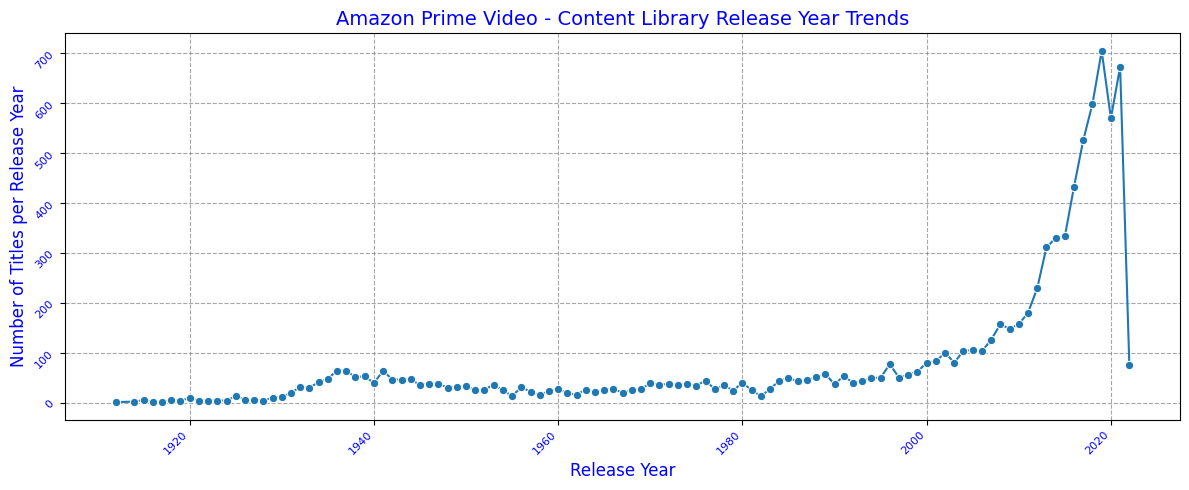

In [35]:
# Chart - 4 visualization code

fig2,axs2=plt.subplots(figsize=(12,5))
df_lineplot=df_unique_ids.groupby('release_year').agg(Count=('id','count')).reset_index()
df_lineplot['Count']=df_lineplot['Count'].astype('Int64')

# create seaborn line plot with label formatting etc.
sns.lineplot(data=df_lineplot,x='release_year',y='Count',marker='o',palette='inferno')

# Font size and color settings for title, axes labels and the tick labels
axs2.set_xlabel('Release Year',color='blue',fontsize=12)
axs2.set_ylabel('Number of Titles per Release Year',color='blue',fontsize=12)
axs2.set_title('Amazon Prime Video - Content Library Release Year Trends',fontsize=14,color='blue')
axs2.set_xticklabels(axs2.get_xticklabels(), color='blue',fontsize=8,rotation=45,ha='right')
axs2.set_yticklabels(axs2.get_yticklabels(), color='blue',fontsize=8,rotation=45)

# lineplot grid styling for both x-axes and y-axes
axs2.grid(axis='x', linestyle='--', color='gray', alpha=0.7, linewidth=0.8)
axs2.grid(axis='y', linestyle='--', color='gray', alpha=0.7, linewidth=0.8)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

As Release year is a continuous variable, line plots are the best way to show how counts change over time.

I choosed this chart because I wanted to do a Trend analysis of the content count with the title release year because line plot clearly highlights growth patterns, spikes, and dips (e.g., sharp rise after 2010, dip after 2020).


##### 2. What is/are the insight(s) found from the chart?

* Prime Video library contains some classic/archival movies (release years between 1900-1960), but they form a tiny share.
* Similar count(i.e. less than 100 titles) in the time frame between 1960's and 90's indicates Prime Video has limited representation of mid-century titles.
* Noticeable growth in the number of releases since 2000 onwards suggests that Prime’s catalog is focussed toward modern content which was a good strategy.
* This might have infact set up the base for the huge spike one can see between 2010-2020 where peak release counts reached above 700 titles per year.
* However, one can see a  sharp drop betwee 2021–2022 which might suggest a slowdown in the velocity of Amazon's acquisition of recent content or perhaps due to temporary production issues becuase of Covid pandemic.
* Also, Dataset appears to be incomplete possibly recent years titles may not yet be fully added to the catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it does impact positively as there showed a good spike between 2010-20 suggesing that Amazon does want to picture itself as modern, up-to-date platform.So, Marketing and Sales team should continue their focus on recent releases that is aligned with the preferences of most streaming subscribersand thus keeps them engaged.

However, Expanding into older, rare, or timeless classics can attract audiences who value vintage content and thus differentiate Prime Video from other competitor platforms.

#### Chart - 5 - Scatter Plot: Relationship Analysis - IMDb Votes vs IMDb Rating (log scale)

In [36]:
# Chart - 5 visualization code

# create scatter plot using  plotly graph_objects module
scatter_trace=go.Scatter(x=df_unique_ids['imdb_score'], y=df_unique_ids['imdb_votes'], mode='markers',marker=dict(size=8,color='red',opacity=0.7), name='Scatter Plot')
fig_release_yr=go.Figure(data=[scatter_trace])

# update plot details i.e. height, width, title, fonts,color , axis labels
fig_release_yr.update_layout(
                  height=600,
                  width=1200,
                  title="Amazon Prime Video - Relationship Analysis - IMDb Votes vs IMDb Rating",
                  title_font={'size':20,'color':'darkblue'},
                  font=dict(size=15,color='darkblue'),
                  xaxis_title='IMDb Rating',
                  yaxis_title='IMDb Votes (log scale)'
                 )
# perform log scale on the IMBD_Votes values (Y-axis)
fig_release_yr.update_yaxes(type='log')
fig_release_yr.show()


##### 1. Why did you pick the specific chart?

A scatter plot is generally recommended tp visualize the relationship between two numerical variables, helping to identify correlations, patterns, and trends in data that has been paired for each data point.

Therefore, for this case I choose scatter plot with log scale on IMDb votes (Y- axes) and IMDb Rating (X-axes) as this should help reveal relationships and the spread in skewed data.

##### 2. What is/are the insight(s) found from the chart?

* Overall, titles with higher IMDb ratings (7-9) tend to also get more votes implying audiencens engage with high rated content.
* A dense cluster can be seen around 7–8 rating with 100k+ votes and this area audiences are like ie. they are most globally popular titles.
* However, the correlation is not very strong at all time as some low-rated shows also have high votes.
* Some titles with more than 8 ratings  have very few votes. This could imply new releases, or good titles exist but with limited audience awareness.
* Majority of titles lie in the 100 - 10,000 vote range, showing that very few titles really are engaging.It implies Prime Video’s library Vote distribution is skewed i.e. few blockbusters but more of lesser-known titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see highly rated & highly voted content drives both audience satisfaction and user engagement so prime video should continue acquiring or even producing similar content.

Marketing team should focus on ways of promoting those titles which have high-rating but with low votes so as to increase watch hours.



#### Chart - 6: Amazon Prime Video - Mean IMDb Rating Yearly Trends

In [37]:
# Chart - 6 visualization code

# Derive Mean IMDb Rating of all Titles in each release year
df_rating_trend=df_unique_ids.groupby('release_year').agg(Avg_Votes=('imdb_score','mean')).reset_index()
df_rating_trend['Avg_Votes']=df_rating_trend['Avg_Votes'].round(2)
df_rating_trend=df_rating_trend.sort_values(by='release_year',ascending=True)

# create line plot using  plotly graph_objects module
line_trace=go.Scatter(x=df_rating_trend['release_year'], y=df_rating_trend['Avg_Votes'], mode='lines+markers',marker=dict(size=8,color='blue',opacity=0.7), name='Line Plot')
fig_rating_trend=go.Figure(data=[line_trace])

# update plot details i.e. height, width, title, fonts,color , axis labels
fig_rating_trend.update_layout(
                  height=600,
                  width=1200,
                  title="Line Plot:Amazon Prime Video - Mean IMDb Rating Yearly Trends",
                  title_font={'size':20,'color':'darkblue'},
                  font=dict(size=15,color='darkblue'),
                  xaxis_title='Release Year',
                  yaxis_title='Mean IMDb Rating'
                 )
#display line plot
fig_rating_trend.show()

##### 1. Why did you pick the specific chart?

Again, Release year is a continuous variable, line plots are the best way to show Trends or visualization over time periods.

Therefore, i picked line plot in this case the Mean IMDb Rating vs Release Year plot as a good way to show long-term trends in audience reception.

##### 2. What is/are the insight(s) found from the chart?

* Ratings varied sharply in the early years (pre-1940's release dates).Few years show very high averages (above 7),indicating presence of highly rated classics.But, reason could also be be due to low volume of releases and fewer reviews been done.

* Post 1940s till 1980s, mean IMDb ratings mostly hovered between 5.5–6.2, showing relative stability implying decent number of titles got added and reviews also recieved.

* From the 1990s onward, ratings show a mild upward trend (around 6–6.3 average).Could be due to better production quality, global reach, or broader IMDb user participation.

* Noticeable decline in ratings after 2010 (below 6 in many years).May indicate content saturation or more critical audiences with streaming era growth.

* However, the spike in 2023+ suggests few newer releases entries in Prime Videos' library could be see and also performing better which is a good sign.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Classic Movies (pre-1930s & selective 1960s/1990s hits) can be highlighted to marketing team  since they stand out with above-average ratings and so could be leveraged in their acquisition strategy.

While it is clear that Prime Video holds content across decades, but ratings also indicate medium range audience satisfaction. Sales team should keep any eye on this to stay more relevant with modern demands and variety i.e. Prime may need to focus more on quality curation for newer content.

Also, there should be periodic monitoring done of the Trends i.e. Tracking whether post-2020s titles sustain higher ratings. This will help guide future acquisitions & productions.

#### Chart - 7: Plotly Bar Chart - Average IMDb Score by Genre (Content Wise) - Univariate Analysis with dynamic data exploration using interactive buttons

In [48]:
# Define function to create aggregrated sets for mean rating aggregration for each content type
def get_aggdata_by_type(df,aggby_col_list,aggof_col,agg_func,ctype='All'):
  try:
         if ctype == 'All':
              df_agg=df.groupby(aggby_col_list).agg(Avg=(aggof_col,agg_func)).reset_index()
         else:
              df_agg=df.loc[df['type']==ctype].groupby(aggby_col_list).agg(Avg=(aggof_col,agg_func)).reset_index()

         df_agg['Avg']=df_agg['Avg'].round(2)
         df_agg=df_agg.sort_values(by='Avg',ascending=False)
         return df_agg

  except Exception as e:
        print("Below error occurred during execution of get_aggdata_by_type function.Please check and retry")
        print(f"{str(e)}")

# Define function to get popular crew members data by role (Default top 20 crew (Actors/Directors) will be returned
def get_popular_crew_by_role(df,role,topN=20):
  try:
      df=df[df['role']==role]
      df=df.sort_values(by='Avg',ascending=False)
      if topN < 0:
        return df
      return df.head(topN)
  except Exception as e:
        print("Below error occurred during execution of get_popular_crew_by_role function.Please check and retry")
        print(f"{str(e)}")

# Create a function to display Plotly interactive 3 bar charts
def display_interactive_bar_charts():
  try:
      # Create a Plotly Figure object and add the Bar plot traces for the 3 created sets
      fig_bp = go.Figure()
      fig_bp.add_trace(go.Bar(
                                  x=df_avg_imdb_score_all['genres'],
                                  y=df_avg_imdb_score_all['Avg'],
                                  text=df_avg_imdb_score_all['Avg'],
                                  texttemplate='%{text}',
                                  hovertemplate='<b>Genre:</b> %{x}<br><b>Avg Rating:</b> %{y}<extra></extra>',
                                  #marker=dict(color=colors),
                                  #colors=bar_colors,
                                  visible=True
                                )

      )
      fig_bp.add_trace(go.Bar(
                                  x=df_avg_imdb_score_movies['genres'],
                                  y=df_avg_imdb_score_movies['Avg'],
                                  text=df_avg_imdb_score_movies['Avg'],
                                  texttemplate='%{text}',
                                  hovertemplate='<b>Genre:</b> %{x}<br><b>Avg Rating:</b> %{y}<extra></extra>',
                                  visible=False
                                )

      )

      fig_bp.add_trace(go.Bar(
                                  x=df_avg_imdb_score_shows['genres'],
                                  y=df_avg_imdb_score_shows['Avg'],
                                  text=df_avg_imdb_score_shows['Avg'],
                                  texttemplate='%{text}',
                                  hovertemplate='<b>Genre:</b> %{x}<br><b>Avg Rating:</b> %{y}<extra></extra>',
                                  visible=False
                                )

      )

      # update plot details i.e. height, width, title, fonts,color , axis labels
      # Add a dropwdown button to toggle visibility
      fig_bp.update_layout(
          updatemenus=[
              dict(
                  type="dropdown",
                  direction="down",
                  buttons=list([
                      dict(
                          args=[{"visible": [True, False,False]},{"title": "Bar Plot: Average IMDb Score by Genre (All Content)"}],
                          label="All Content",
                          method="update"
                      ),
                      dict(
                          args=[{"visible": [False, True,False]},{"title": "Bar Plot: Average IMDb Score by Genre (Movies)"}],
                          label="Movies",
                          method="update"
                      ),
                      dict(
                          args=[{"visible": [False,False, True]},{"title": "Bar Plot: Average IMDb Score by Genre (TV Shows)"}],
                          label="TV Shows",
                          method="update"
                      )
                  ]),
                  pad={"r": 10, "t": 10},
                  showactive=True,
                  x=1.01,
                  xanchor="right",
                  y=1.15,
                  yanchor="top"
              )
          ],
          height=600,
          width=1200,
          title="Bar Plot: Average IMDb Score by Genre (All Content)", ## Default Title
          title_font={'size':20,'color':'darkblue'},
          font=dict(size=15,color='darkblue'),
          xaxis_title='Genre',
          yaxis_title='Mean IMDb Rating'
      )

      fig_bp.show()

  except Exception as e:
      print("Below error occurred during execution of display_interactive_bar_charts function.Please check and retry")
      print(f"{str(e)}")



In [49]:
# Chart - 7 visualization code

#Get data with Mean IMDb Rating of all Content aggregrated by genres
df_avg_imdb_score_all=get_aggdata_by_type(df=df_genres.copy(),aggby_col_list=['genres'],aggof_col='imdb_score',agg_func='mean')

#Get data with Mean IMDb Rating of all Movies aggregrated by genres
df_avg_imdb_score_movies=get_aggdata_by_type(df=df_genres.copy(),aggby_col_list=['genres'],aggof_col='imdb_score',agg_func='mean',ctype='MOVIE')

#Get data with Mean IMDb Rating of all TV Shows aggregrated by genres
df_avg_imdb_score_shows=get_aggdata_by_type(df=df_genres.copy(),aggby_col_list=['genres'],aggof_col='imdb_score',agg_func='mean',ctype='SHOW')

# call Function to display interactive charts for the above 3 aggregrations
display_interactive_bar_charts()

##### 1. Why did you pick the specific chart?

The main reason i opted for this chart is for dynamically exploring the data. For this case I wanted a chart where i could compare Average Ratings by Genre for Movie , TV Shows separately as well as combined.

So, Plotly's interactive features with Buttons allow users to dynamically change the data displayed in the bar chart.

Also, instead of presenting all possible data variations at once, buttons enable a cleaner, more focused visualization. Users can choose to view only the information relevant to their current inquiry, reducing the visual clutter

##### 2. What is/are the insight(s) found from the chart?

* TV Shows consistently rate higher (mostly between 6.7 – 7.8) compared to Movies (mostly 4.7 – 6.7).This is suggesting that Prime Video TV Shows maintain higher audience satisfaction and quality consistency.

* Both formats share the same top 3 genres (History, War, Documentary), but TV Shows score 1+ point higher, showing audiences enjoy longer, serialized storytelling in these genres.

* Even the “weakest rated” TV show genres perform better than the weakest movies.Notably, if see Horror it is really bad in Movies (4.71) but vs strong in TV Shows (7.41).

* If we check the ratings across all content togetherm, Documentaries (6.87), History (6.72), and Reality (6.67) lead with the highest IMDb averages.This implys that relatively non-fictional, informative, or real-life inspired content is being liked more by the viewers.

* Family, Romance, Crime, Comedy, Fantasy etc.ratings are almost near the 6.0 mark which indicates these genres are popular but with a wide scale of user opinion, since they cater to diverse tastes while some love them others might rate them poorly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, clear message for Business team (Sales or Marketing) is that Amazon Prime should highlight Documentaries, Historical, and Reality shows as “high-quality” content categories and promote them more to attract serious, knowledge-seeking viewers.

However, Horror, Sci-Fi, and Action, the focus should be on quality over quantity. Selective acquisitions of critically acclaimed titles could raise the average.

Since Families & casual viewers might gravitate toward Drama, Comedy, and Romance despite their mid-level scores prime video should continue acquisition and production of these genres too.

Marketing team can do campaigns to emphasize Prime’s documentary & history collection as a differentiator against competitors.


#### Chart - 8: Donut Chart -  Regionwise Content Distribution (Top 10 Countries and Rest of the World)

In [40]:
# Chart - 8 visualization code

# County wise Content aggregration - Top 10 Countries
df_region=df_pcountry.groupby(['production_countries']).agg(Count=('id','count')).reset_index()
df_region=df_region.sort_values(by='Count',ascending=False)

#Rest of the countries aggregration
restCount=np.sum(df_region['Count'][10:])
df_region=df_region.head(10)
df_region=pd.concat([df_region,pd.DataFrame([dict(production_countries='Rest Of the World',Count=restCount)])])

# set custom colors
colors = ['#FF9933', '#66B2FF','#6ED5E0','#6EE0B2','#6E9CE0','#127A57','#B8B877','#DBDB97','#A8A2A2','#CFC8C8']

# Create the donut chart
fig_dn = go.Figure(data=[go.Pie(labels=df_region['production_countries'],
                                values=df_region['Count'],
                                hole=.4,
                                marker=dict(colors=colors),
                                text=df_region['production_countries'],
                                texttemplate='%{text}',
                                hovertemplate='<b>Country:</b> %{label}<br><b>Titles Count:</b> %{value}<br><b>Percentage:</b> %{percent}<extra></extra>',
                                showlegend=False
                                )
                        ]
                   )

# Customize the layout height,weight and font size , color
fig_dn.update_layout(title_text='Amazon Prime Video - RegionWise Content Distribution (Top 10 Countries and Rest of the World)',
                      height=600,
                      width=1200,
                      title_font={'size':20,'color':'darkblue'},
                      font=dict(size=12,color='darkblue')
                     )
fig_dn.update_traces(textinfo="label+text+value+percent")

# Display the chart
fig_dn.show()



##### 1. Why did you pick the specific chart?

I picked donut chart here because the goal is to show share of total catalog by country/region. It makes the dominance of the US and the small contribution of other markets immediately obvious,which then helps in arriving at quick insights.

A bar chart could work, but the donut visually reinforces the “whole vs. parts” relationship better.

##### 2. What is/are the insight(s) found from the chart?

* Over 50% of Amazon Prime Video’s catalog is from the United States.This indicates strong dependence on Hollywood productions.While it appeals to global English-speaking audiences, it risks over-reliance on one market.

* India holds the second-largest share after the US.It does show Amazon’s intent to push into India with regional movies and original series.Looks like this is a strategic move since India is one of the fastest-growing OTT markets.

* With UK & Canada having similar shares almost equal to India's, we can safely conclude that these four countries (US, India, UK, Canada) together account for ~70–75% of Prime’s content base.

* However, this also suggests limited diversity where markets like Europe & Asia despite being large markets with strong local film/TV industries were not tapped by Prime fully.

* Also, from Rest of the World a very small portion comes from countries outside the top 10. It indicate that Amazon Prime has low penetration in regional contents of other countries like Japan , South Korea where some incredibly good content get created.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it is clear signal for Sales and marketing team that India is a very good market and prime Video has to keep expanding regional language content (Hindi, Tamil, Telugu, Malayalam, Bengali, etc.).Invest more in Indian Originals (movies + TV shows), since demand is good.

However, focus on every Opportunity in Europe & Asia. Investments should defintely be done in local Originals in Japan, Germany, France, South Korea which are an untapped market for Prime.

While focus on production and acquiring Hollywood content should continue steps need to be in place to remove any over dependancy on the US region. Costing related factors in the US market or other competitor factors could weaken the  Prime’s content library.

So, bottom line is that prime video should diversify beyond US-centric catalog and leverage  categories in rest of the world. Though small but can provide unique, differentiated titles and improve user subscription and engagement.


#### Chart - 9: Bar Plot in Subplots - Region Wise Content Popularity Comparisions - IMDb vs TMDb

In [41]:
# Chart - 9 visualization code

# County wise Content aggregration by Total IMDb Votes- Top 10 Countries
df_pc_imdb=get_aggdata_by_type(df=df_pcountry.copy(),aggby_col_list=['production_countries'],aggof_col='imdb_votes',agg_func='sum')
df_pc_imdb=df_pc_imdb.head(10)

# County wise Content aggregration by Total TMDb Popularity index- Top 10 Countries
df_pc_tmdb=get_aggdata_by_type(df=df_pcountry.copy(),aggby_col_list=['production_countries'],aggof_col='tmdb_popularity',agg_func='sum')
df_pc_tmdb=df_pc_tmdb.head(10)

# create plotly 2 subplots for IMDb vs TMDb parallel visualizations
fig_region_pop = make_subplots(rows=1, cols=2, subplot_titles=('IMDb Based (Top 10 Popular Countries)', 'TMDb Based (Top 10 Popular Countries)'))

# create hovertext labels for both the sub plots
hovertext1 = [f'Country: {cat}<br>Total Votes Received: {val}' for cat, val in zip(df_pc_imdb['production_countries'], df_pc_imdb['Avg'])]
hovertext2 = [f'Country: {cat}<br>Total Popularity Index: {val}' for cat, val in zip(df_pc_tmdb['production_countries'], df_pc_tmdb['Avg'])]

# Add first bar trace to the first subplot
fig_region_pop.add_trace(go.Bar(x=df_pc_imdb['production_countries'],y=df_pc_imdb['Avg'],name='IMDb Popularity',hoverinfo='text',hovertext=hovertext1),row=1, col=1)

# Add second bar trace to the second subplot
fig_region_pop.add_trace(go.Bar(x=df_pc_tmdb['production_countries'], y=df_pc_tmdb['Avg'],name='TMDb Popularity',hoverinfo='text',hovertext=hovertext2),row=1, col=2)

# Customize the layout height,weight,title and corresponding font size,color
fig_region_pop.update_layout(
                            height=500,
                            width=1200,
                            title_font={'size':20,'color':'darkblue'},
                            font=dict(size=10,color='blue'),
                            title_text="Region Wise Content Popularity - Mean IMDb Votes Received vs Cumulative TMDB Popularity", title_x=0.5,
                            showlegend=False
                           )

# Customize the axes labels for both the subplots.
fig_region_pop.update_xaxes(title_text="Country", row=1, col=1)
fig_region_pop.update_yaxes(title_text="Total IMDb Votes Received", row=1, col=1)
fig_region_pop.update_xaxes(title_text="Country", row=1, col=2)
fig_region_pop.update_yaxes(title_text="Cumulative TMDb Popularity", row=1, col=2)

#display the chart
fig_region_pop.show()


##### 1. Why did you pick the specific chart?

I wanted to visualize the TMDb vs IMDb popularity ratings on a single visual plot for ease in comparison.Thefore, I opted fo this subplot feature with 2 subplots in one row allowing bar charts for IMDb and TMDb popularity data adjacently.

Bar charts because no of regions being huge and the best comparison would be beween top 10 regions on either platform.


##### 2. What is/are the insight(s) found from the chart?

* On both IMDb (votes received) and TMDB (popularity), the United States massively outperforms every other country.This implies that US-produced content has the strongest global audience engagement and recognition.

* United Kingdom, India, France, Canada, Germany, Japan appear in both charts, but their popularity is much lower compared to the US.However, these regions contribute consistently across both IMDb and TMDB, meaning they are reliable secondary markets.

* Some countries appear in one ranking but not the other suggesting platform-specific audience behavior. IMDb is more of an English Speaking platform whereas TMDb is a social media driven popularity



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Prime's content strategy is focussed heavily on US content since it drives the majority of global engagement. However, at the same time, it should expand regional investments in India, UK, France, Canada, and Germany, as they provide steady contributions across both platforms.

Also, the insights suggests a platform based approach where regions which heavily use  IMDb Prime  should put forward features that encourage rating & reviewing. While at the same time for TMDb Countries it should  push social media promotions and content influencer tie-ups etc.

Care should be taken to avoid risks with over-dependence on one market which is in this case - the US market. So, strengthening presence in emerging markets like India & Mexico ensures future growth and reduces risk.



#### Chart - 10: Bar Plot in Subplots - Region Wise Content Quality Comparisions - IMDb vs TMDb

In [42]:
# Chart - 10 visualization code

# County wise Content aggregration by Mean IMDb Score- Top 10 Countries
df_pc_rating_imdb=get_aggdata_by_type(df=df_pcountry.copy(),aggby_col_list=['production_countries'],aggof_col='imdb_score',agg_func='mean')
df_pc_rating_imdb=df_pc_rating_imdb.head(10)

# County wise Content aggregration by Mean TMDb score- Top 10 Countries
df_pc_rating_tmdb=get_aggdata_by_type(df=df_pcountry.copy(),aggby_col_list=['production_countries'],aggof_col='tmdb_score',agg_func='mean')
df_pc_rating_tmdb=df_pc_rating_tmdb.head(10)

# create plotly 2 subplots for IMDb vs TMDb parallel visualizations for easy comparison
fig_region_quality = make_subplots(rows=1, cols=2, subplot_titles=('Mean IMDb Ratings (Top 10 Countries)', 'Mean TMDb Ratings (Top 10 Countries)'))
hovertext1 = [f'Country: {cat}<br>Average IMDb Rating: {val}' for cat, val in zip(df_pc_rating_imdb['production_countries'], df_pc_rating_imdb['Avg'])]
hovertext2 = [f'Country: {cat}<br>Average TMDb Rating: {val}' for cat, val in zip(df_pc_rating_tmdb['production_countries'], df_pc_rating_tmdb['Avg'])]

# Add first bar trace to the first subplot
fig_region_quality.add_trace(go.Bar(x=df_pc_rating_imdb['production_countries'],y=df_pc_rating_imdb['Avg'],name='IMDb Ratings',hoverinfo='text',hovertext=hovertext1),row=1, col=1)

# Add second bar trace to the second subplot
fig_region_quality.add_trace(go.Bar(x=df_pc_rating_tmdb['production_countries'], y=df_pc_rating_tmdb['Avg'],name='TMDb Ratings',hoverinfo='text',hovertext=hovertext2),row=1, col=2)

# Customize the layout height,weight,title and corresponding font size,color
fig_region_quality.update_layout(
                            height=500,
                            width=1200,
                            title_font={'size':20,'color':'darkblue'},
                            font=dict(size=10,color='blue'),
                            title_text="Region Wise Content Quality- Mean IMDb Score vs Mean TMDB Score", title_x=0.5,
                            showlegend=False
                           )

# Customize the axes labels for both the subplots.
fig_region_quality.update_xaxes(title_text="Country", row=1, col=1)
fig_region_quality.update_yaxes(title_text="Mean IMDb Rating", row=1, col=1)
fig_region_quality.update_xaxes(title_text="Country", row=1, col=2)
fig_region_quality.update_yaxes(title_text="Mean TMDb Rating", row=1, col=2)

# display the chart
fig_region_quality.show()


##### 1. Why did you pick the specific chart?

Like the previous chart here also I wanted to visualize compairson friendly visualization. In this quality comparison to be done the TMDb vs IMDb ratings on a single visual plot for ease in comparison.

Thefore, I opted fo this subplot feature with 2 subplots in one row allowing bar charts for IMDb and TMDb ratings(quality) data adjacently.



##### 2. What is/are the insight(s) found from the chart?

* This gives a different picture when checked with the popularity comparision visualizations that was done previous to this one. Top countries (French Polynesia, Georgia, Albania, Cuba, Syria, Afghanistan, Pakistan, etc.) have very high IMDb averages (7.0–7.8).

* One important combined insight from previous chart is that this indicates consistent quality output, even though the content volume from these regions is relatively small implying smaller/less dominant film industries often produce niche, critically appreciated content that resonates with audiences.

* However, this could not be considered as a universal fact because it can be seen in the TMDb chart that the Dominican Republic leads with a perfect score of 10 which is generally not feasible but it shows up likely due to a small number of highly rated titles.

* Compared to IMDb, TMDB shows greater variance and reflects more social-driven popularity ratings.IMDb ratings tend to be more constricted (around 7–8), while TMDB has more extremes (10 and below 7), suggesting IMDb audiences rate more critically, while TMDB audiences rate more emotionally/popularity-driven.

* Regions like Georgia and Pakistan appear in both IMDb and TMDB Top 10, showing they are consistently strong in quality perception across both rating platforms.

* Japan & China show up in TMDB but not in IMDb — this indicates their content generates regional buzz but needs more IMDb user engagement globally.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, surely Amazon can license or produce more titles from countries like Georgia, Albania, Cuba, and Pakistan that are consistently produce highly rated content. This could appeal to quality-conscious audiences and improve user engagement.

Also, Since IMDb and TMDB cater to different user bases, Amazon should also have a balanced approach in acquiring content (both critically acclaimed and mainstream content).

US and India dominate in volume and popularity (from previous charts), but these regions show higher quality perception despite smaller output.Amazon can differentiate by curating high-quality picks from these smaller markets to attract pro-quality audiencee

#### Chart - 11- Grouped Bar Plots: Top 20  Movie Actors and Directors with Most Popular Titles

In [43]:
# Chart - 11 visualization code

#Remove any possible duplicate crew records (if any) from parent dataset to get crew details
df_crew_data=prime_dataset.drop_duplicates(subset=['role','name','title','id'],keep='first')

# Get Popular MOVIE crew aggregrated by total IMDb Votes
df_film_crew_m=get_aggdata_by_type(df=df_crew_data,aggby_col_list=['role','name'],aggof_col='imdb_votes',agg_func='sum',ctype='MOVIE')

# Get Popular TV SHOW crew aggregrated by total IMDb Votes
df_film_crew_s=get_aggdata_by_type(df=df_crew_data,aggby_col_list=['role','name'],aggof_col='imdb_votes',agg_func='sum',ctype='SHOW')

# Call Function to Get Popular Movie Actors data
df_actor_movies_pop=get_popular_crew_by_role(df=df_film_crew_m,role='ACTOR')

# Call Function to Get Popular Movie Directors data
df_director_movies_pop=get_popular_crew_by_role(df=df_film_crew_m,role='DIRECTOR')

# custom hover text for each role - director or actor
hover1 = [f'Actor: {cat}<br>Total Title Votes: {val}' for cat, val in zip(df_actor_movies_pop['name'], df_actor_movies_pop['Avg'])]
hover2 = [f'Director: {cat}<br>Total Title Votes: {val}' for cat, val in zip(df_director_movies_pop['name'], df_director_movies_pop['Avg'])]

# create bar chart in group mode for visualizing both popular directors and actors
fig_crew = go.Figure(data=[
         go.Bar(name='Top 20 Popular Actors', x=df_actor_movies_pop['name'], y=df_actor_movies_pop['Avg'],hoverinfo='text',hovertemplate=('Actor: %{x}<br>' +'Total Title Votes: %{y}<br><extra></extra>')),
         go.Bar(name='Top 20 Popular Directors', x=df_director_movies_pop['name'], y=df_director_movies_pop['Avg'],hoverinfo='text',hovertemplate=('Director: %{x}<br>' +'Total Title Votes: %{y}<br><extra></extra>'))
     ])

# customize the layout details
fig_crew.update_layout(height=500,
                      width=1200,
                      title_font={'size':20,'color':'darkblue'},
                      font=dict(size=10,color='darkblue'),
                      title_text="Popular Movie Actors vs Popular Movie Directors (Based on Title Popularity - IMDb Platform)",
                      xaxis_title='Name of Actor/Director',
                      yaxis_title='Total Title Votes',
                      barmode='group',
                      bargap=.2,
                      bargroupgap=0.4,
                      xaxis=dict(tickangle=-45),
                      showlegend=True,
                      )


# display the chart
fig_crew.show()


##### 1. Why did you pick the specific chart?

My primary intent was to show a direct Comparison Between the content in prime video of the popular Actors & Directors.

I wanted to do this in a single chart than 2 separate charts and since the grouped layout makes the contrast immediately obvious.

##### 2. What is/are the insight(s) found from the chart?

* Most actors(blue bars) in the list consistently cross 1.5M+ votes, showing very high audience interaction on the titles they were casted .The popularity distribution among actors is relatively even, with only a few extreme leaders like Bruce Willis who leads by a wide margin (~2.5M votes).

* Coming to Directors (Red Bars), there is a sharp drop after the top 3 directors, implying a steeper decline in popularity compared to actors.James Cameron dominates director popularity , followed by M. Night Shyamalan and Mel Gibson.

* Legendary names like Ridley Scott, Martin Scorsese, Tim Burton appear lower, indicating that their popularity on IMDb (votes-based) is not as high as blockbuster directors like Cameron or Shyamalan.

* The top actors have higher total popularity than almost all directors except James Cameron indicating actors attracting more IMDb popularity.This means Audience engagement seems to be more actor-driven than director-driven at least from the IMDb voting perspective.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, since actors draw more popularity, Amazon Prime can leverage big actors like Bruce Willis or Brad Pitt movies in marketing campaigns to attract quick audience attention.

However, Director Branding also matters Prime Sales team can curate "Director Specials" collections (e.g., James Cameron Movies) to cater to movie lovers.

Primce can also consider Actor-Director Combination Strategy under which Content featuring popular actors who worked under excellent directors can be dual-leverage for business.

Overall, Amazon can balance its library with Actor oriented picks to increase Subscriber growth (mass audience) and also increase quality with titles of stalwart movie makers.

#### Chart - 12: Stacked Bar Chart - Amazon Prime Video Movie Titles Distribution by Release year (Actors)

In [44]:
# Chart - 12 visualization code
# Top 20 Popular Movie Actors Content Distribution by Release year and Name
# Filter title details from main dataset for the top 20 popular movie actors
df_pop_movie_actor_details=prime_dataset[prime_dataset['name'].isin(df_actor_movies_pop['name'].tolist())]
df_pop_movie_actor_details=df_pop_movie_actor_details.drop_duplicates(subset=['release_year','name','title','id'],keep='first')

# Aggregrate the total count of titles by title release_year and name of each actor
df_crew=get_aggdata_by_type(df=df_pop_movie_actor_details,aggby_col_list=['release_year','name'],aggof_col='id',agg_func='count')

# create stacked bar chart for visualization
fig_crew=plx.bar(data_frame=df_crew,
           x='release_year',
           y='Avg',
           title="Amazon Prime Video Content Distribution by Release Year of each Movie (Top 20 Popular Actors)",
           text='Avg',
           labels={'name':'Actor','release_year':'Movie Released Year','Avg':'Total Titles in Prime Library'},
           color='name'
          )
fig_crew.update_layout(height=600,
                  width=1000,
                  title_font={'size':15,'color':'darkblue'},
                  font=dict(size=10,color='darkblue'),
                 )
fig_crew.show()



##### 1. Why did you pick the specific chart?

The stacked bar chart is useful in a different way than the grouped bar chart. I need a complex comparision which is to show how top actors’ movies are distributed across time in the prime video catalog.So, this stacked bar chart looked perfect for this case.

##### 2. What is/are the insight(s) found from the chart?

* This suggests Prime Video’s catalog heavily features classic 90s and early 2000s blockbusters.

* However, Few titles exist from the 80s and early 90s, meaning older classics with these actors are under represented.

* After 2010, the number of movies featuring these popular actors drops sharply.
 and in recent years (2015–2022) there is very low distribution across these popular actors.

* Steve Buscemi, Peter Stormare, and Bruce Willis appear repeatedly across multiple decades, making them consistent contributors to Prime’s library.

* Others like Eddie Murphy, Brad Pitt, Sean Lawlor appear fewer times, so their representation is more limited.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, there is a Content Freshness Gap as we can see that Prime’s catalog for these top actors is heavily outdated to 1990s titles.

Infact Lack of modern hits (2015–2022) may weaken Prime’s ability to attract younger viewers who engage more with recent releases.

The strong presence of 90s/2000s movies can be marketed under “All Time Hit  Collections” thus targeting both older and younger audience.

Business could also work  to expand rights for newer movies of these same actors.This would balance the freshness and refresh Prime Video’s star-driven catalog.

At the same time, Prime should ensure these actors’ iconic titles across all eras are consistently available.


#### Chart - 13: Stacked Bar Chart - Amazon Prime Video Movie Titles Distribution by Release year (Directors)

In [45]:
# Chart - 13 visualization code
# Top 20 Popular Movie Directors Content Distribution by Release year and Name
# Filter title details from main dataset for the top 20 popular Moive Directors
df_pop_director_movie_details=prime_dataset[prime_dataset['name'].isin(df_director_movies_pop['name'].tolist())]
df_pop_director_movie_details=df_pop_director_movie_details.drop_duplicates(subset=['release_year','name','title','id'],keep='first')

# Aggregrate the total count of titles by title release_year and name of each actor
df_crewd=get_aggdata_by_type(df=df_pop_director_movie_details,aggby_col_list=['release_year','name'],aggof_col='id',agg_func='count')

# create stacked bar chart for visualization
fig_crew=plx.bar(data_frame=df_crewd,
           x='release_year',
           y='Avg',
           title="Amazon Prime Video Content Distribution by Release Year of each Movie (Top 20 Popular Directors)",
           text='Avg',
           labels={'name':'Director','release_year':'Movie Released Year','Avg':'Total Titles in Prime Library',},
           color='name'
          )

#customize the chart layout
fig_crew.update_layout(height=600,
                  width=1000,
                  title_font={'size':15,'color':'darkblue'},
                  font=dict(size=10,color='darkblue'),
                 )

#display the chart
fig_crew.show()



##### 1. Why did you pick the specific chart?

Like for popular actors titles comparison across time, I need similar one to show how top directors’ movies are distributed across time in the prime video catalog.So, this stacked bar chart looked perfect for this case.

##### 2. What is/are the insight(s) found from the chart?

* Similar to the actors’ chart, this shows when top directors’ works (that exist in the Prime library) were released.

* Certain directors dominate in particular timeframes. For eg. 1995–2005: Content from big names like Scorsese, James Cameron, and Joel Coen can be found.
while in 2005–2015 time frame,  Heavy contributions from Bryan Singer, Ridley Scott, and Robert Zemeckis can be found..

* This suggests Prime has a balanced portfolio of iconic directors, instead of over-concentrating on just one.

* Classic Directors (Scorsese, Ridley Scott, Cameron) bring prestige and evergreen demand while Modern Directors (Denis Villeneuve, Neill Blomkamp) Attract younger, sci-fi/action-heavy audiences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Insights like these guide content acquisition & marketing strategies where the marketing teams can highlight Scorsese movies as “classic cinema” while highlighting Denis Villeneuve movies to appeal to "Dune" fans.

Overall, great directors works add prestige to the prime video platform and also add credibility. So, business should continue acquiring these director classics but also focus on fresh content with latest director greats like Christopher Nolan etc. would attract younger audience.

#### Chart - 14 - Correlation Heatmap

In [46]:
# Correlation Heatmap visualization code

# Call Function to Get Popular TV Show Actors data
df_actor_shows_pop=get_popular_crew_by_role(df=df_film_crew_s,role='ACTOR')

# Call Function to Get Popular TV Show Directors data
df_director_shows_pop=get_popular_crew_by_role(df=df_film_crew_s,role='DIRECTOR')

# Filter TV Shows details of Popular TV Artistes
df_pop_allroles_shows_details=prime_dataset[prime_dataset['name'].isin(df_film_crew_s.head(20)['name'].tolist())]
df_pop_allroles_shows_details=df_pop_allroles_shows_details.drop_duplicates(subset=['release_year','name','title','id'],keep='first')

# Filter TV Shows details of Popular Directors
df_pop_director_shows_details=prime_dataset[prime_dataset['name'].isin(df_director_shows_pop['name'].tolist())]
df_pop_director_shows_details=df_pop_director_shows_details.drop_duplicates(subset=['release_year','name','title','id'],keep='first')

# Filter TV Shows details of Popular Actors
df_pop_actor_shows_details=prime_dataset[prime_dataset['name'].isin(df_actor_shows_pop['name'].tolist())]
df_pop_actor_shows_details=df_pop_actor_shows_details.drop_duplicates(subset=['release_year','name','title','id'],keep='first')

# Aggregrate the imdb_score of titles by title release_year and name of each artiste
df_shows_acrew=get_aggdata_by_type(df=df_pop_allroles_shows_details,aggby_col_list=['release_year','name'],aggof_col='imdb_score',agg_func='mean')
df_shows_acrew=df_shows_acrew.sort_values(by='release_year')
df_shows_acrew['release_year']=df_shows_acrew['release_year'].dt.strftime('%Y')

# Aggregrate the imdb_score of titles by title release_year and name of each director
df_shows_crewd=get_aggdata_by_type(df=df_pop_director_shows_details,aggby_col_list=['release_year','name'],aggof_col='imdb_score',agg_func='mean')
df_shows_crewd=df_shows_crewd.sort_values(by='release_year')
df_shows_crewd['release_year']=df_shows_crewd['release_year'].dt.strftime('%Y')

# Aggregrate the imdb_score of titles by title release_year and name of each actor
df_shows_crewa=get_aggdata_by_type(df=df_pop_actor_shows_details,aggby_col_list=['release_year','name'],aggof_col='imdb_score',agg_func='mean')
df_shows_crewa=df_shows_crewa.sort_values(by='release_year')
df_shows_crewa['release_year']=df_shows_crewa['release_year'].dt.strftime('%Y')

# # Create a Figure object
fig_crew_hm = go.Figure()

#Add the heatmap trace for  dataset of top Aristes
fig_crew_hm.add_trace(go.Heatmap(
                            x=df_shows_acrew['name'],
                            y=df_shows_acrew['release_year'],
                            z=df_shows_acrew['Avg'],
                            colorscale='Viridis',
                            text=df_shows_acrew['Avg'],
                            texttemplate='%{text}',
                            colorbar=dict(title='Mean TV Show Rating'),
                            hovertemplate='<b>Artiste Name:</b> %{x}<br><b>Release Year:</b> %{y}<br><b>Mean TV Show Rating:</b> %{z}<extra></extra>',
                            showscale=True,
                            visible=True

                          )

)

#Add the heatmap trace for  dataset of top Directors
fig_crew_hm.add_trace(go.Heatmap(
                            x=df_shows_crewd['name'],
                            y=df_shows_crewd['release_year'],
                            z=df_shows_crewd['Avg'],
                            colorscale='Viridis',
                            text=df_shows_crewd['Avg'],
                            texttemplate='%{text}',
                            colorbar=dict(title='Mean TV Show Rating'),
                            hovertemplate='<b>Director Name:</b> %{x}<br><b>Release Year:</b> %{y}<br><b>Mean TV Show Rating:</b> %{z}<extra></extra>',
                            showscale=True,
                            visible=False
                          )

)

#Add the heatmap trace for  dataset of top Actors
fig_crew_hm.add_trace(go.Heatmap(
                            x=df_shows_crewa['name'],
                            y=df_shows_crewa['release_year'],
                            z=df_shows_crewa['Avg'],
                            colorscale='Viridis',
                            text=df_shows_crewa['Avg'],
                            texttemplate='%{text}',
                            colorbar=dict(title='Mean TV Show Rating'),
                            hovertemplate='<b>Actor Name:</b> %{x}<br><b>Release Year:</b> %{y}<br><b>Mean TV Show Rating:</b> %{z}<extra></extra>',
                            showscale=True,
                            visible=False
                          )

)

# # Add a button to toggle visibility
fig_crew_hm.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            buttons=list([
                dict(
                    args=[{"visible": [True, False,False]},{"title": "Yearly Trend of the TV Shows (Mean Rating) done by Popular TV Artistes (Top 20)"}],
                    label="All Artistes",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True,False]},{"title": "Yearly Trend of the TV Shows (Mean Rating) done by Popular TV Directors (Top 20)"}],
                    label="Directors",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False,False, True]},{"title": "Yearly Trend of the TV Shows (Mean Rating) done by Popular TV Actors (Top 20)"}],
                    label="Actors",
                    method="update"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.21,
            xanchor="right",
            y=1.15,
            yanchor="top"
        )
    ],
    title='Yearly Trend of the TV Shows (Mean Rating) done by Popular TV Artistes (Top 20)',
    height=500,
    width=1200,
    title_font={'size':20,'color':'darkblue'},
    font=dict(size=12,color='darkblue'),
    xaxis_title='TV Artiste Name',
    yaxis_title='TV Show Release Year'
)

# Display the heat map chart
fig_crew_hm.show()


##### 1. Why did you pick the specific chart?

I wanted a chart to compare multi dimensional data easily and patterns emerge quickly from the chart. In this case I wanted to check data of 20 odd actors/directors over a wide time range and without any cluster.

 I choose Heat Map as it allows dense, multi-dimensional data (actor × year × rating) to be compared easily and strategic decisions to made faster.

##### 2. What is/are the insight(s) found from the chart?

* Overall, it shows that Ratings are spread between 4.7 to 8.7, with most clustering in the 6.0–8.5 range . This shows strong TV content quality among these artistes.

* There are some consistently High-Performing Artistes eg: Hugh Laurie, Michael C. Hall etc. as we can see multiple 8+ rated TV shows. This indicates they are bankable faces for Prime’s library.

* 2004–2010 can be termed as the Golden era — several artistes delivered 8.3–8.7 rated shows consistently (e.g: Dexter, House M.D. etc.) followed by the 2012–2016 period where artisted appear with back-to-back 8.5 ratings.

* However, 2019 onwards ratings slightly flattened (6–7 range) mostly with few outliers with 8+. Clearly suggests recent shows haven’t matched the earlier critical acclaim but then they also help identify areas where Prime might avoid promoting weak titles


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, High-value artistes (8+ ratings) should be heavily marketed in  “Best Rated” collections as this captures viewer trust.Prime’s strength lies in proven classics and they can continue to anchor evergreen engagement.

However, flatter ratings (6–7 range) should also be kept in mind and Prime needs to invest more in new and fresh high-rated TV Content or originals to maintain competitive edge with Netflix & Disney+.

#### Chart - 15 - Pair Plot

In [47]:
# Pair Plot visualization code
numeric_columns=['runtime','imdb_votes','tmdb_popularity','imdb_score','tmdb_score']
#sns.pairplot(df_genres[numeric_columns])
fig_pp = plx.scatter_matrix(df_genres, dimensions=numeric_columns, color="genres",
                            title="Amazon Prime Video - Pairwise Relationship Analysis Of Numerical Metrics",
                            labels={'genres':'Genre','runtime':'Runtime','imdb_votes':'IMDb Votes','tmdb_popularity':'TMDb Popularity','imdb_score':'IMDb Rating','tmdb_score':'TMDb Rating'})

fig_pp.update_layout(
    width=1200,
    height=650,
    title_font={'size':20,'color':'darkblue'},
    font=dict(size=10,color='darkblue')
)
# Display the plot
fig_pp.show()

##### 1. Why did you pick the specific chart?

In this case goal was to explore Many Numerical Relationships at Once on a single chart and also correlate with a categorical variable i.e. Genre.

While we can use separate scatter plots for each pair , I choose the Pairplot as that makes it easy to see which variables are correlated, independent etc in one glance. With the color/hue feature it made it easy to combine the categorical dimension to this analysis.


##### 2. What is/are the insight(s) found from the chart?

* Regarding runtime it can be seen that most content falls in the 90–150 minutes range while longer runtimes exist but they don’t correlate with higher ratings.Ratings remain clustered around 6–8 regardless of runtime, suggesting runtime is not a strong predictor of quality perception.

* As for IMDb Votes vs. IMDb/ TMDb Ratings we can observe that High-vote titles tend to be in the 7–9 IMDb rating , while Low-vote titles show wide variation in rating (from 3 to 9).

* As for TMDb Popularity (popularity index) vs. Votes we can observe a strong positive correlation: higher IMDb votes is directly correlated to higher TMDb popularity.

* For IMDb Rating vs. TMDb Rating it is almost like a perfect linear relationship.This means insights from one platform reliably extend to the other.

* For Genre Trends (color-coded clusters) we can clearly see that Drama, Action, Crime, and Thriller dominate the dense high-rating/high-votes clusters whereas Genres like Reality TV, Music, and Westerns are scattered with lower votes and weaker popularity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Sales team should focus Focus on medium runtime, high-vote, blockbuster genres for maximum Return On Investment.

While prime can double down on Crime/Drama/Thriller/Action it has to use Comedy/Family strategically but carefully, since they’re unpredictable in audience reception.

Prime can confidently use either IMDb or TMDb as proxy indicators of success when evaluating acquisitions as both are aligned with each other.

Also, Prime doesn’t need excessively long movies/series to gain higher ratings. Instead, they can focus on good storytelling in optimal runtime windows (90–150 mins).




## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Solution to meet the primary objective of engagement, subscriber retention and growth, and Return of investment:

* Improve Diversity in the Content and not stick only to specific Genres but also prioritize genres with historically strong ratings (Drama, Thriller, Action).

* As a marketing strategy those  shows already gaining traction in votes/popularity should be advertised and marketed heavily.

* Region Wise acquisition should also be a primary focus as it allows to lean into region wise local hits which might not be globally available. Prime video can use this to get a competitive advantage.

* Freshness in Content is key and so invest to acquire or produce modern era popular shows (originals) and movies should defintely give a boost in the ROI and popularity of Prime.

* Secure long-term contracts with consistently high-rated actors and Track performance dips and avoid over-investing in declining stars.

* Use IMDb votes & TMDb popularity as early success signals to boost marketing and distribution of high-performing shows.

* At the same time Prime should also Revive and repurpose successful content from golden years (2004–2010) and promote them to attract both old and new audiences.

* Client should  balance safe bets (high-rating genres/actors) with innovative experiments and should track audience signals for marketing.

This will ensure maximized engagement, better retention, and smarter content spend.

# **Conclusion**

Genres like Drama, Thriller, and Action consistently drive higher ratings, while Comedy, Reality, and Animation offer mixed performance but expand audience reach.

Actors with proven track records should be prioritized, though contracts must be carefully structured to account for performance drops.

Business should work on the below takeways:

Content acquisition & production (invest in proven genres and actors).

Marketing strategy (amplify shows already gaining traction in votes/popularity).

Portfolio diversification (balance safe high-rating genres with experimental formats).

Audience retention (leverage nostalgia and timeless classics).

This analysis shoud equip Amazon Prime Video with a roadmap to maximize user engagement, improve subscription growth and user retention,  improve the Return on Investment, and make it a strong competitor in the streaming market.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***